# Telecom Churn - Group Case Study

## Business Problem Overview


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
##To capture processing time of the script
import time
start = time.time()

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc, roc_auc_score
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from itertools import islice

In [4]:
##Importing dataset
df = pd.read_csv('telecom_churn_data.csv')
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## Inspecting Dataset

In [5]:
df.shape

(99999, 226)

In [6]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [7]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
# Mobile number is insignificant, thus dropping it. Circle ID has same value for all rows thus not necessary.
df1 = df.copy()   #Backup
df1.drop('mobile_number',inplace=True,axis=1)
df1.drop('circle_id',inplace=True,axis=1)

In [9]:
# Checking for Null values
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [10]:
#Filtering high value customers
#Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount 
#in the first two months (the good phase).

df1['total_rech_amt_good_phase'] = (df1['total_rech_amt_6'] + df1['total_rech_amt_7'])/2  #Good Phase
df1 = df1[df1['total_rech_amt_good_phase'] > df1['total_rech_amt_good_phase'].quantile(0.70)]
df1['total_usage_col'] = df1['total_og_mou_9'] + df1['total_ic_mou_9'] + df1['vol_2g_mb_9'] + df1['vol_3g_mb_9']
df1['churn'] = np.where(df1['total_usage_col']== 0, 1, 0)

In [11]:
#Checking the percentage of Churns for high value customers
df1['churn'].value_counts(normalize=True)*100

0    91.363955
1     8.636045
Name: churn, dtype: float64

It is a highly imbalanced dataset

In [12]:
#Dropping the column created for filtration only
df1.drop(['total_rech_amt_good_phase','total_usage_col'],axis=1,inplace=True)
df1.shape

(29979, 225)

In [13]:
#After tagging churners, removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)
df1.drop([col for col in df1.columns if '_9' in col], axis = 1,inplace=True)
df1.drop('sep_vbc_3g', axis=1,inplace=True)
df1.shape

(29979, 170)

In [14]:
#Removing Last Date of Month columns since they add no value to the churn logic and have zero variance
df1.drop([col for col in df1.columns if 'last_date_of_month' in col], axis = 1,inplace=True)
df1.shape

(29979, 167)

In [15]:
#Checking remaining non numeric columns, and convert datetime columns to Datetime type
dt_cols = df1.select_dtypes(exclude=[np.number]).columns.tolist()
df1[dt_cols] = df1[dt_cols].apply(pd.to_datetime)

In [16]:
#Removing all columns which has zero variance and does not aid in the churn prediction
df1_temp = df1.drop(dt_cols,axis=1)
selector = VarianceThreshold(0)
selector.fit(df1_temp)
filtered_columns = df1_temp.columns[selector.get_support(indices=True)]
df2 = df1[filtered_columns]
df2[dt_cols] = df1[dt_cols]

#List of columns removed for zero variance
df1_temp.columns[~selector.get_support(indices=False)]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [17]:
#Populating the missing dates for data with the last original recharge 
df2['date_of_last_rech_data_6'].fillna(df2['date_of_last_rech_6'],inplace=True)
df2['date_of_last_rech_data_7'].fillna(df2['date_of_last_rech_7'],inplace=True)
df2['date_of_last_rech_data_8'].fillna(df2['date_of_last_rech_8'],inplace=True)

df2['date_of_last_rech_6'] = pd.to_datetime(df2.date_of_last_rech_6).dt.day
df2['date_of_last_rech_7'] = pd.to_datetime(df2.date_of_last_rech_7).dt.day
df2['date_of_last_rech_8'] = pd.to_datetime(df2.date_of_last_rech_8).dt.day
df2['date_of_last_rech_data_6'] = pd.to_datetime(df2.date_of_last_rech_data_6).dt.day
df2['date_of_last_rech_data_7'] = pd.to_datetime(df2.date_of_last_rech_data_7).dt.day
df2['date_of_last_rech_data_8'] = pd.to_datetime(df2.date_of_last_rech_data_8).dt.day

In [18]:
#Now populating the date column with their modes for the few missing values
for i in dt_cols:
    df2[i].fillna(df2[i].mode()[0],inplace=True)
    
#Populating FB User Nulls with -1, assuming no facebook usage and no night packs taken
df2['fb_user_6'].fillna(-1,inplace=True)
df2['fb_user_7'].fillna(-1,inplace=True)
df2['fb_user_8'].fillna(-1,inplace=True)
df2['night_pck_user_6'].fillna(-1,inplace=True)
df2['night_pck_user_7'].fillna(-1,inplace=True)
df2['night_pck_user_8'].fillna(-1,inplace=True)

#In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
               'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
               'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8' ]
df2[zero_impute] = df2[zero_impute].apply(lambda x: x.fillna(0))

In [19]:
# Checking for Null values again
round(100*(df2.isnull().sum()/len(df2.index)), 2)

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
loc_og_t2t_mou_6             1.05
loc_og_t2t_mou_7             1.01
loc_og_t2t_mou_8             3.13
loc_og_t2m_mou_6             1.05
loc_og_t2m_mou_7             1.01
loc_og_t2m_mou_8             3.13
loc_og_t2f_mou_6             1.05
loc_og_t2f_mou_7             1.01
loc_og_t2f_mou_8             3.13
loc_og_t2c_mou_6             1.05
loc_og_t2c_mou_7             1.01
loc_og_t2c_mou_8             3.13
loc_og_mou_6                 1.05
loc_og_mou_7                 1.01
loc_og_mou_8  

In [20]:
#Dropping columns with veru high Null Values
drop_cols = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8', 'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
            'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8']
df2.drop(drop_cols,axis=1,inplace=True)
round(100*(df2.isnull().sum()/len(df2.index)), 2)

arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
onnet_mou_6                 1.05
onnet_mou_7                 1.01
onnet_mou_8                 3.13
offnet_mou_6                1.05
offnet_mou_7                1.01
offnet_mou_8                3.13
roam_ic_mou_6               1.05
roam_ic_mou_7               1.01
roam_ic_mou_8               3.13
roam_og_mou_6               1.05
roam_og_mou_7               1.01
roam_og_mou_8               3.13
loc_og_t2t_mou_6            1.05
loc_og_t2t_mou_7            1.01
loc_og_t2t_mou_8            3.13
loc_og_t2m_mou_6            1.05
loc_og_t2m_mou_7            1.01
loc_og_t2m_mou_8            3.13
loc_og_t2f_mou_6            1.05
loc_og_t2f_mou_7            1.01
loc_og_t2f_mou_8            3.13
loc_og_t2c_mou_6            1.05
loc_og_t2c_mou_7            1.01
loc_og_t2c_mou_8            3.13
loc_og_mou_6                1.05
loc_og_mou_7                1.01
loc_og_mou_8                3.13
std_og_t2t

## Imputing Values using KNN Imputer

In [21]:
 date_cols = ['last_date_of_month_6',
              'last_date_of_month_7',
              'last_date_of_month_8',
              'date_of_last_rech_6',
              'date_of_last_rech_7',
              'date_of_last_rech_8',
              'date_of_last_rech_data_6',
              'date_of_last_rech_data_7',
              'date_of_last_rech_data_8',
             ]
#Using Iterative Imputer or KNN to impute missing values
df2_temp = df2.drop(dt_cols,axis=1)
imputer = IterativeImputer(random_state=0)
imputer = KNNImputer()
df2_temp[:]= imputer.fit_transform(df2_temp)
imputed_cols = df2_temp.columns
df2[imputed_cols] = df2_temp
round(100*(df2.isnull().sum()/len(df2.index)), 2)

arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t2m_mou_8            0.0
loc_og_t2f_mou_6            0.0
loc_og_t2f_mou_7            0.0
loc_og_t2f_mou_8            0.0
loc_og_t2c_mou_6            0.0
loc_og_t2c_mou_7            0.0
loc_og_t2c_mou_8            0.0
loc_og_mou_6                0.0
loc_og_mou_7                0.0
loc_og_mou_8                0.0
std_og_t2t_mou_6            0.0
std_og_t

In [22]:
############In case the above imputaion is heavy run the below script for median imputation
#Filing missing values with the median
#missing_cols = df2.columns[df2.isnull().sum()>0]
#for col in missing_cols:
#    df2[col].fillna((df2[col].median()), inplace=True)
#round(100*(df2.isnull().sum()/len(df2.index)), 2) 

In [23]:
df2.shape

(29979, 146)

## Outlier Treatment

In [24]:
#Outlier Treatment
df2.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,

There are outliers present

In [25]:
#Capping to 99%
for col in df2.columns:
    percentiles = df2[col].quantile([0.01,0.99]).values
    df2[col][df2[col] <= percentiles[0]] = percentiles[0]
    df2[col][df2[col] >= percentiles[1]] = percentiles[1]

In [26]:
df2.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.0000

Calculate difference between 8th and previous months
Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

# Feature Engineering

In [27]:
df2['arpu_diff'] = df2.arpu_8 - ((df2.arpu_6 + df2.arpu_7)/2)
df2['onnet_mou_diff'] = df2.onnet_mou_8 - ((df2.onnet_mou_6 + df2.onnet_mou_7)/2)
df2['offnet_mou_diff'] = df2.offnet_mou_8 - ((df2.offnet_mou_6 + df2.offnet_mou_7)/2)
df2['roam_ic_mou_diff'] = df2.roam_ic_mou_8 - ((df2.roam_ic_mou_6 + df2.roam_ic_mou_7)/2)
df2['roam_og_mou_diff'] = df2.roam_og_mou_8 - ((df2.roam_og_mou_6 + df2.roam_og_mou_7)/2)
df2['loc_og_mou_diff'] = df2.loc_og_mou_8 - ((df2.loc_og_mou_6 + df2.loc_og_mou_7)/2)
df2['std_og_mou_diff'] = df2.std_og_mou_8 - ((df2.std_og_mou_6 + df2.std_og_mou_7)/2)
df2['isd_og_mou_diff'] = df2.isd_og_mou_8 - ((df2.isd_og_mou_6 + df2.isd_og_mou_7)/2)
df2['spl_og_mou_diff'] = df2.spl_og_mou_8 - ((df2.spl_og_mou_6 + df2.spl_og_mou_7)/2)
df2['total_og_mou_diff'] = df2.total_og_mou_8 - ((df2.total_og_mou_6 + df2.total_og_mou_7)/2)
df2['loc_ic_mou_diff'] = df2.loc_ic_mou_8 - ((df2.loc_ic_mou_6 + df2.loc_ic_mou_7)/2)
df2['std_ic_mou_diff'] = df2.std_ic_mou_8 - ((df2.std_ic_mou_6 + df2.std_ic_mou_7)/2)
df2['isd_ic_mou_diff'] = df2.isd_ic_mou_8 - ((df2.isd_ic_mou_6 + df2.isd_ic_mou_7)/2)
df2['spl_ic_mou_diff'] = df2.spl_ic_mou_8 - ((df2.spl_ic_mou_6 + df2.spl_ic_mou_7)/2)
df2['total_ic_mou_diff'] = df2.total_ic_mou_8 - ((df2.total_ic_mou_6 + df2.total_ic_mou_7)/2)
df2['total_rech_num_diff'] = df2.total_rech_num_8 - ((df2.total_rech_num_6 + df2.total_rech_num_7)/2)
df2['total_rech_amt_diff'] = df2.total_rech_amt_8 - ((df2.total_rech_amt_6 + df2.total_rech_amt_7)/2)
df2['max_rech_amt_diff'] = df2.max_rech_amt_8 - ((df2.max_rech_amt_6 + df2.max_rech_amt_7)/2)
df2['total_rech_data_diff'] = df2.total_rech_data_8 - ((df2.total_rech_data_6 + df2.total_rech_data_7)/2)
df2['max_rech_data_diff'] = df2.max_rech_data_8 - ((df2.max_rech_data_6 + df2.max_rech_data_7)/2)
df2['av_rech_amt_data_diff'] = df2.av_rech_amt_data_8 - ((df2.av_rech_amt_data_6 + df2.av_rech_amt_data_7)/2)
df2['vol_2g_mb_diff'] = df2.vol_2g_mb_8 - ((df2.vol_2g_mb_6 + df2.vol_2g_mb_7)/2)
df2['vol_3g_mb_diff'] = df2.vol_3g_mb_8 - ((df2.vol_3g_mb_6 + df2.vol_3g_mb_7)/2)  

#Median value of Internet usage (2G + 3G) across months was created to capture the churn rate as it was observed majority of the churn happens when the internet usage pattern shows a decline
df2['int_usage_median'] = df2[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
df2['int_usage_median'] = df2.int_usage_median.map(lambda x: 1 if x == 0 else 0)
df2.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],axis=1,inplace=True)

In [28]:
#Categorizing Columns
date_cols = ['date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
            ]
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
            ]
num_cols = [column for column in df2.columns if column not in date_cols + cat_cols]

In [29]:
# change columns types
df2[num_cols] = df2[num_cols].apply(pd.to_numeric)
df2[cat_cols] = df2[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [30]:
df2.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 164 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   arpu_6                    float64 
 1   arpu_7                    float64 
 2   arpu_8                    float64 
 3   onnet_mou_6               float64 
 4   onnet_mou_7               float64 
 5   onnet_mou_8               float64 
 6   offnet_mou_6              float64 
 7   offnet_mou_7              float64 
 8   offnet_mou_8              float64 
 9   roam_ic_mou_6             float64 
 10  roam_ic_mou_7             float64 
 11  roam_ic_mou_8             float64 
 12  roam_og_mou_6             float64 
 13  roam_og_mou_7             float64 
 14  roam_og_mou_8             float64 
 15  loc_og_t2t_mou_6          float64 
 16  loc_og_t2t_mou_7          float64 
 17  loc_og_t2t_mou_8          float64 
 18  loc_og_t2m_mou_6          float64 
 19  loc_og_t2m_mou_7          float64 
 20  loc_o

In [31]:
# Checking correlation and dropping columns with high corelation
# Create correlation matrix
corr_matrix = df2.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
df3 = df2.drop(to_drop, 1)

In [32]:
df2.shape

(29979, 164)

In [33]:
df3.shape

(29979, 90)

## EDA

In [34]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    else:
        return 'categorical'
    
def univariate(variable, stats=True):    
    if data_type(variable) == 'numerical':
        sns.distplot(variable,kde_kws={'bw': 0.1})
        plt.show()
        if stats == True:
            print(variable.describe())    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        plt.show()
        if stats == True:
            print(variable.value_counts())            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
        plt.show()
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)
        plt.show()

### Univariate and Bivariate Analysis

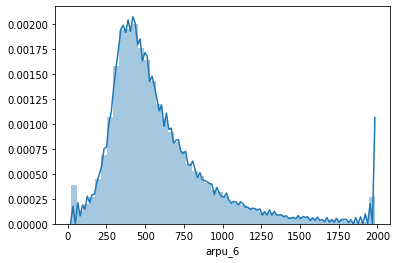

count    29979.000000
mean       578.115790
std        336.036348
min         18.221200
25%        364.352500
50%        495.951000
75%        704.184500
max       1983.590100
Name: arpu_6, dtype: float64


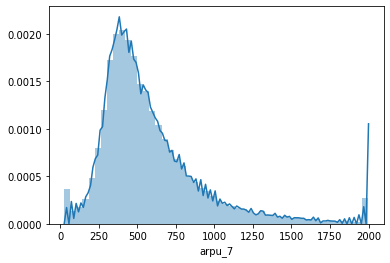

count    29979.00000
mean       579.93420
std        338.20204
min         25.60060
25%        365.23500
50%        493.78100
75%        700.98600
max       1999.50968
Name: arpu_7, dtype: float64


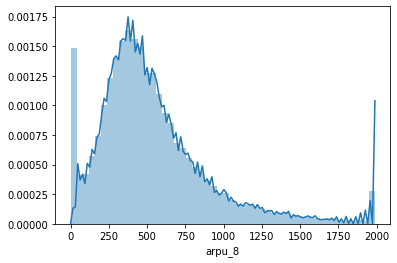

count    29979.000000
mean       524.618925
std        370.788082
min          0.000000
25%        289.782000
50%        452.232000
75%        671.349500
max       1988.082260
Name: arpu_8, dtype: float64


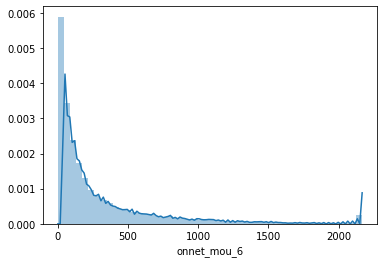

count    29979.000000
mean       288.155041
std        404.919913
min          0.000000
25%         42.230000
50%        126.190000
75%        353.620000
max       2166.876000
Name: onnet_mou_6, dtype: float64


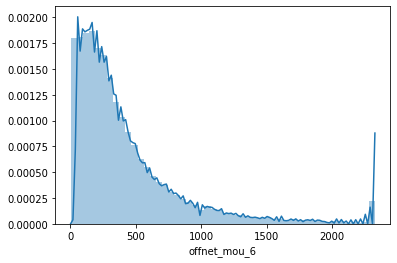

count    29979.000000
mean       411.499382
std        421.136852
min          1.057800
25%        138.600000
50%        282.840000
75%        523.710000
max       2328.192600
Name: offnet_mou_6, dtype: float64


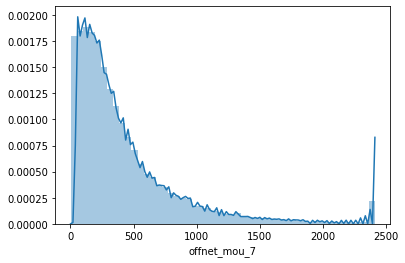

count    29979.000000
mean       416.386720
std        430.337399
min          1.099000
25%        136.410000
50%        282.260000
75%        532.905000
max       2411.004400
Name: offnet_mou_7, dtype: float64


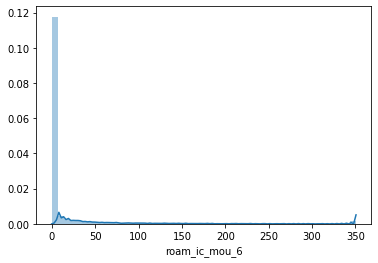

count    29979.000000
mean        15.020708
std         51.536100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        350.541800
Name: roam_ic_mou_6, dtype: float64


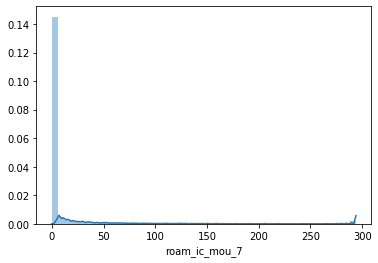

count    29979.000000
mean        10.797230
std         41.008021
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        293.756000
Name: roam_ic_mou_7, dtype: float64


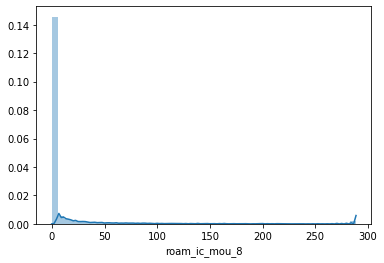

count    29979.000000
mean        10.904976
std         40.520233
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        288.536400
Name: roam_ic_mou_8, dtype: float64


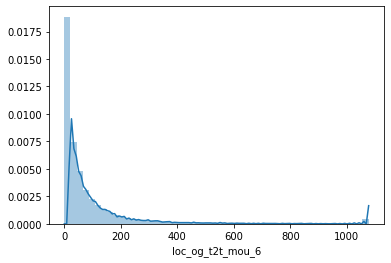

count    29979.000000
mean        86.810965
std        160.043702
min          0.000000
25%          8.650000
50%         32.810000
75%         91.570000
max       1076.635600
Name: loc_og_t2t_mou_6, dtype: float64


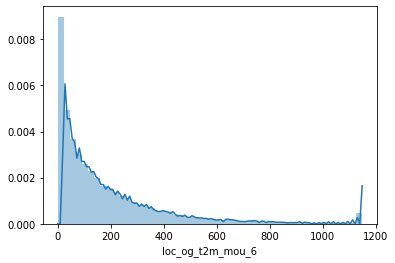

count    29979.000000
mean       176.324738
std        213.322743
min          0.000000
25%         31.280000
50%        101.760000
75%        240.260000
max       1147.821600
Name: loc_og_t2m_mou_6, dtype: float64


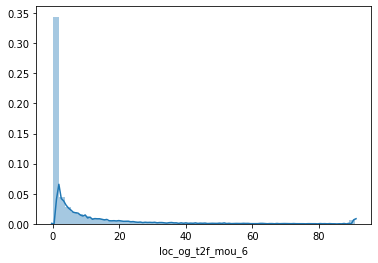

count    29979.000000
mean         6.315566
std         14.603978
min          0.000000
25%          0.000000
50%          0.380000
75%          5.180000
max         90.894400
Name: loc_og_t2f_mou_6, dtype: float64


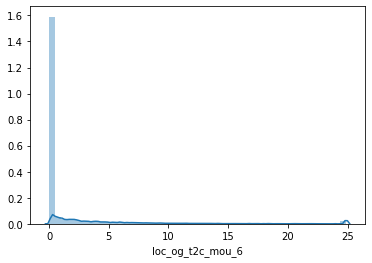

count    29979.000000
mean         1.339335
std          3.958866
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.877600
Name: loc_og_t2c_mou_6, dtype: float64


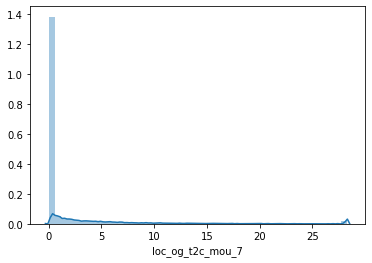

count    29979.000000
mean         1.548622
std          4.476507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.150000
max         28.240000
Name: loc_og_t2c_mou_7, dtype: float64


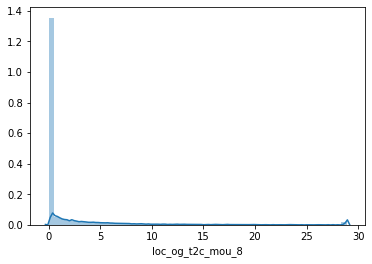

count    29979.000000
mean         1.499196
std          4.434908
min          0.000000
25%          0.000000
50%          0.000000
75%          0.180000
max         28.882200
Name: loc_og_t2c_mou_8, dtype: float64


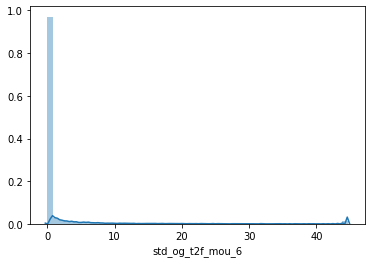

count    29979.000000
mean         1.507898
std          6.069563
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.649400
Name: std_og_t2f_mou_6, dtype: float64


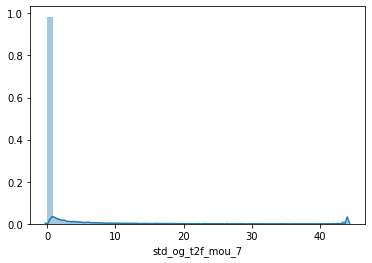

count    29979.000000
mean         1.460600
std          5.938864
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.102000
Name: std_og_t2f_mou_7, dtype: float64


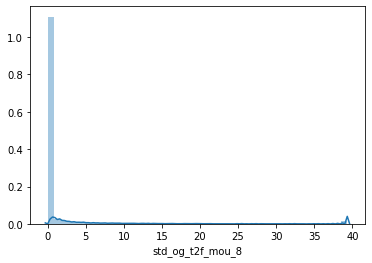

count    29979.000000
mean         1.292319
std          5.326021
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         39.343000
Name: std_og_t2f_mou_8, dtype: float64


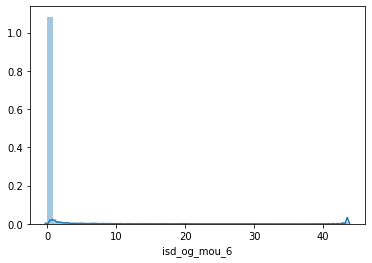

count    29979.000000
mean         0.846982
std          5.109570
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         43.555400
Name: isd_og_mou_6, dtype: float64


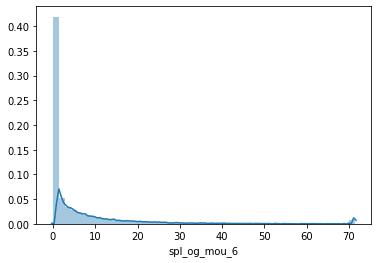

count    29979.000000
mean         5.354501
std         11.521228
min          0.000000
25%          0.000000
50%          0.300000
75%          5.260000
max         71.382000
Name: spl_og_mou_6, dtype: float64


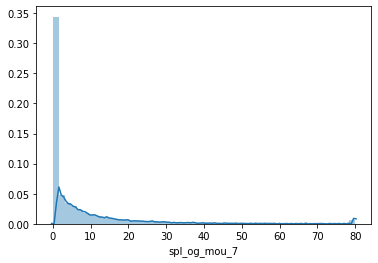

count    29979.000000
mean         6.660812
std         13.307061
min          0.000000
25%          0.000000
50%          0.850000
75%          7.195000
max         79.916400
Name: spl_og_mou_7, dtype: float64


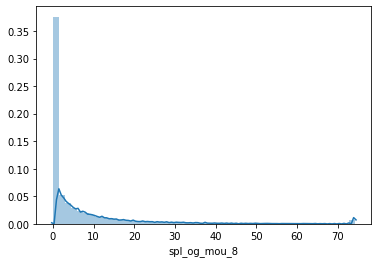

count    29979.000000
mean         6.110269
std         12.269510
min          0.000000
25%          0.000000
50%          0.730000
75%          6.540000
max         74.209800
Name: spl_og_mou_8, dtype: float64


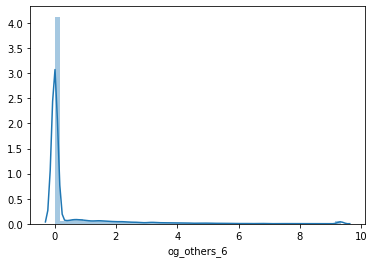

count    29979.000000
mean         0.632008
std          1.628282
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.330000
Name: og_others_6, dtype: float64


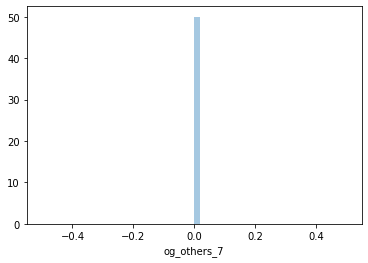

count    29979.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: og_others_7, dtype: float64


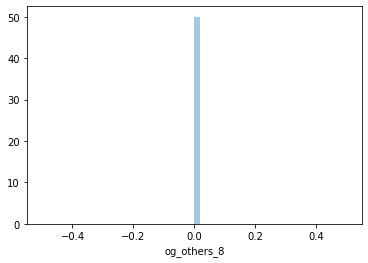

count    29979.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: og_others_8, dtype: float64


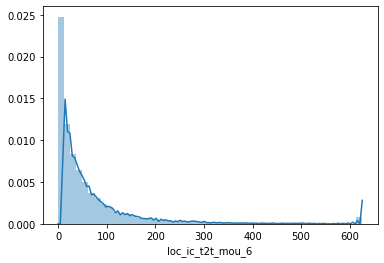

count    29979.000000
mean        63.054029
std         98.149712
min          0.000000
25%          8.690000
50%         29.340000
75%         73.785000
max        625.532600
Name: loc_ic_t2t_mou_6, dtype: float64


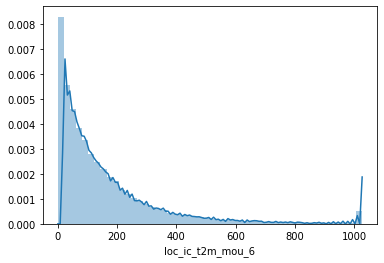

count    29979.000000
mean       154.831940
std        183.291265
min          0.000000
25%         34.400000
50%         94.340000
75%        202.940000
max       1026.568000
Name: loc_ic_t2m_mou_6, dtype: float64


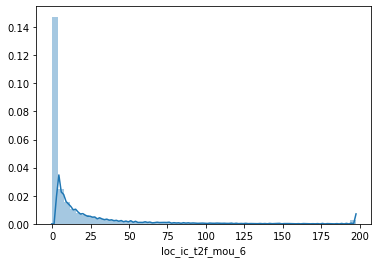

count    29979.000000
mean        14.185489
std         31.228280
min          0.000000
25%          0.000000
50%          2.060000
75%         12.580000
max        197.311000
Name: loc_ic_t2f_mou_6, dtype: float64


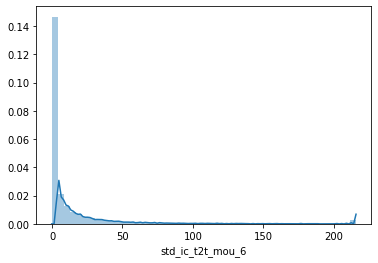

count    29979.000000
mean        13.003215
std         31.984235
min          0.000000
25%          0.000000
50%          1.140000
75%         10.405000
max        215.680000
Name: std_ic_t2t_mou_6, dtype: float64


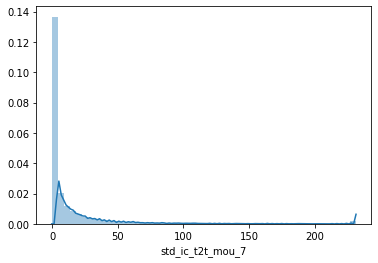

count    29979.000000
mean        13.697557
std         33.750248
min          0.000000
25%          0.000000
50%          1.280000
75%         11.060000
max        231.310400
Name: std_ic_t2t_mou_7, dtype: float64


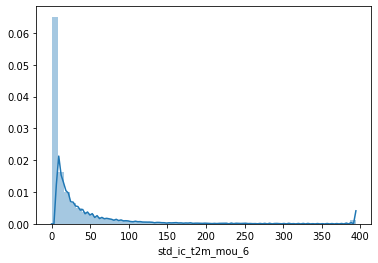

count    29979.000000
mean        28.330058
std         58.796910
min          0.000000
25%          0.560000
50%          7.290000
75%         27.620000
max        393.930200
Name: std_ic_t2m_mou_6, dtype: float64


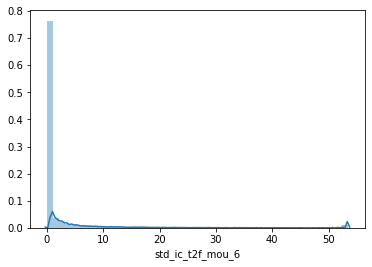

count    29979.000000
mean         2.118814
std          7.456697
min          0.000000
25%          0.000000
50%          0.000000
75%          0.230000
max         53.455400
Name: std_ic_t2f_mou_6, dtype: float64


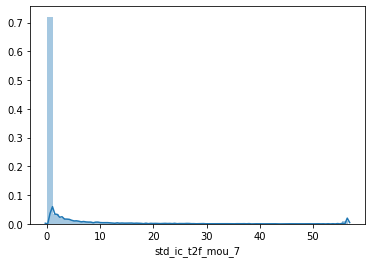

count    29979.000000
mean         2.218255
std          7.830048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.300000
max         56.605400
Name: std_ic_t2f_mou_7, dtype: float64


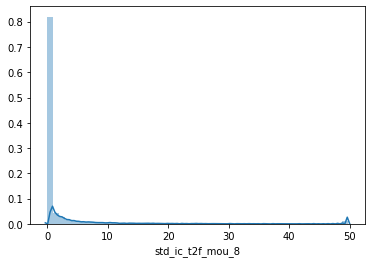

count    29979.000000
mean         1.960985
std          6.912769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.240000
max         49.714400
Name: std_ic_t2f_mou_8, dtype: float64


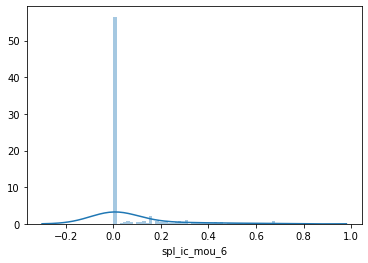

count    29979.000000
mean         0.065372
std          0.147281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.680000
Name: spl_ic_mou_6, dtype: float64


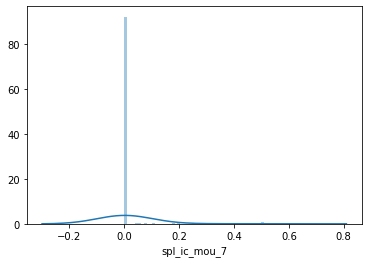

count    29979.000000
mean         0.014549
std          0.070333
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.510000
Name: spl_ic_mou_7, dtype: float64


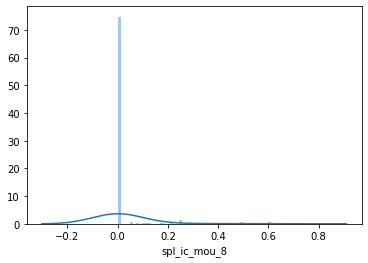

count    29979.000000
mean         0.026571
std          0.101105
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.610000
Name: spl_ic_mou_8, dtype: float64


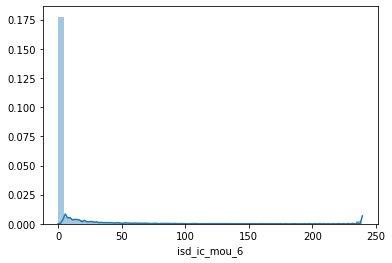

count    29979.000000
mean         8.362923
std         32.299064
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        239.192000
Name: isd_ic_mou_6, dtype: float64


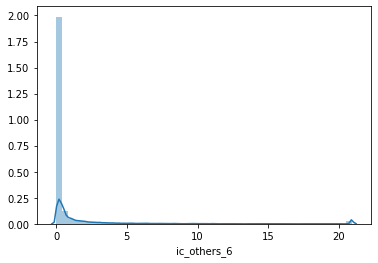

count    29979.000000
mean         0.723819
std          2.791733
min          0.000000
25%          0.000000
50%          0.000000
75%          0.080000
max         20.914400
Name: ic_others_6, dtype: float64


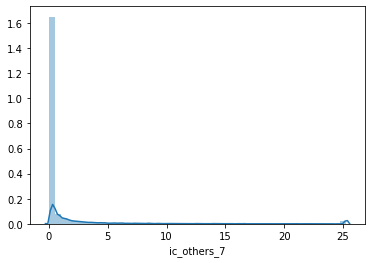

count    29979.000000
mean         0.912584
std          3.435468
min          0.000000
25%          0.000000
50%          0.000000
75%          0.050000
max         25.266600
Name: ic_others_7, dtype: float64


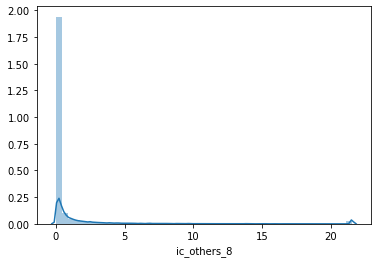

count    29979.000000
mean         0.762765
std          2.909411
min          0.000000
25%          0.000000
50%          0.000000
75%          0.080000
max         21.530000
Name: ic_others_8, dtype: float64


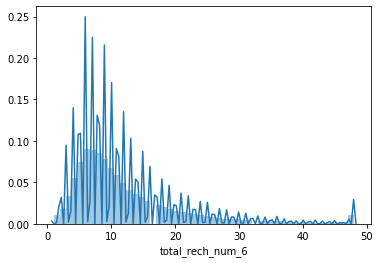

count    29979.000000
mean        11.985323
std          8.627454
min          1.000000
25%          6.000000
50%          9.000000
75%         15.000000
max         48.000000
Name: total_rech_num_6, dtype: float64


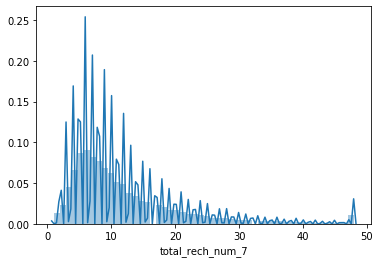

count    29979.000000
mean        11.777077
std          8.825703
min          1.000000
25%          6.000000
50%          9.000000
75%         15.000000
max         48.000000
Name: total_rech_num_7, dtype: float64


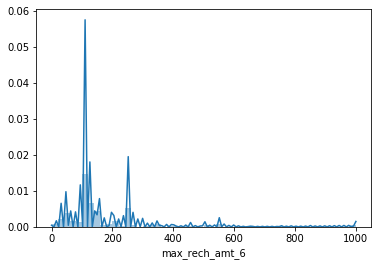

count    29979.000000
mean       168.899263
std        151.404909
min          0.000000
25%        110.000000
50%        120.000000
75%        200.000000
max       1000.000000
Name: max_rech_amt_6, dtype: float64


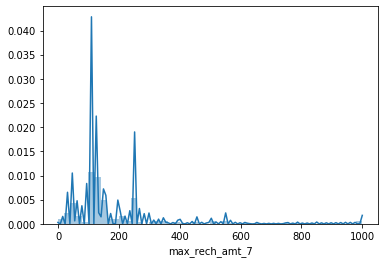

count    29979.000000
mean       172.643917
std        155.496760
min          0.000000
25%        110.000000
50%        128.000000
75%        200.000000
max       1000.000000
Name: max_rech_amt_7, dtype: float64


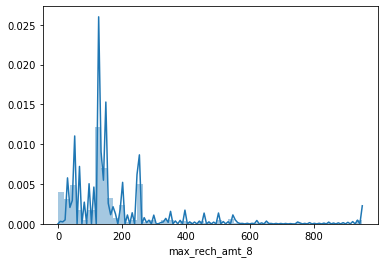

count    29979.000000
mean       160.017279
std        145.059778
min          0.000000
25%         67.000000
50%        130.000000
75%        198.000000
max        951.000000
Name: max_rech_amt_8, dtype: float64


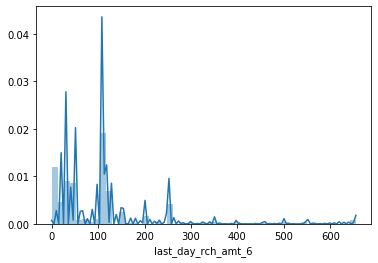

count    29979.000000
mean       100.382568
std        109.365698
min          0.000000
25%         30.000000
50%        110.000000
75%        120.000000
max        655.000000
Name: last_day_rch_amt_6, dtype: float64


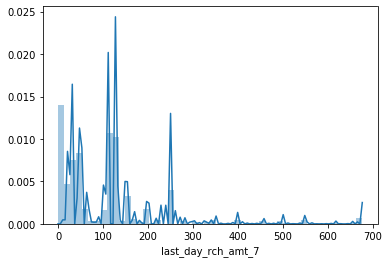

count    29979.000000
mean       101.662264
std        113.498072
min          0.000000
25%         27.000000
50%         98.000000
75%        130.000000
max        675.900000
Name: last_day_rch_amt_7, dtype: float64


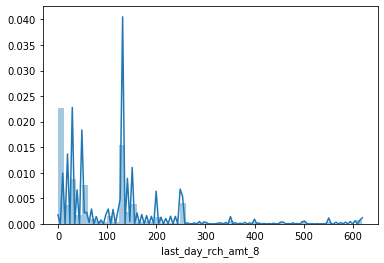

count    29979.000000
mean        91.687781
std        110.360527
min          0.000000
25%          0.000000
50%         50.000000
75%        130.000000
max        619.000000
Name: last_day_rch_amt_8, dtype: float64


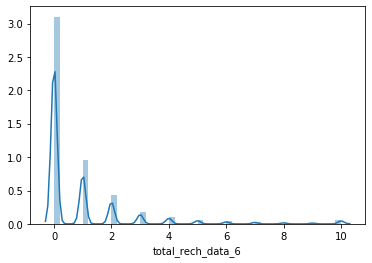

count    29979.000000
mean         0.880316
std          1.716269
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: total_rech_data_6, dtype: float64


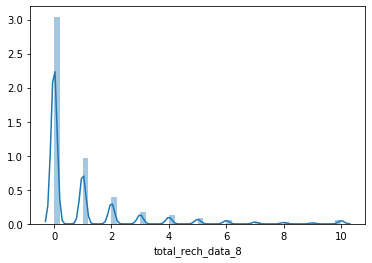

count    29979.000000
mean         0.967777
std          1.837345
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: total_rech_data_8, dtype: float64


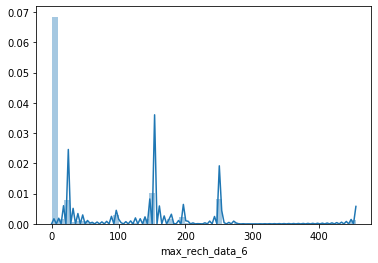

count    29979.000000
mean        55.106508
std         94.240261
min          0.000000
25%          0.000000
50%          0.000000
75%         98.000000
max        455.000000
Name: max_rech_data_6, dtype: float64


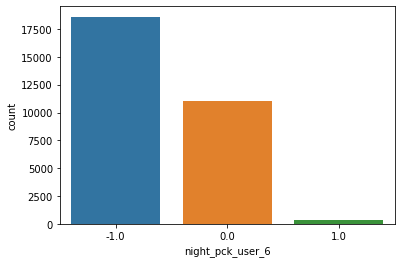

-1.0    18592
 0.0    11076
 1.0      311
Name: night_pck_user_6, dtype: int64


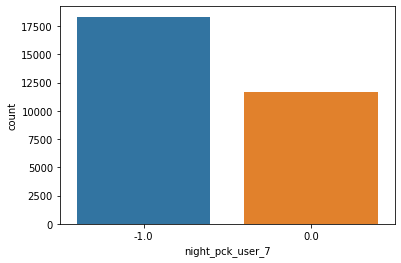

-1.0    18327
 0.0    11652
Name: night_pck_user_7, dtype: int64


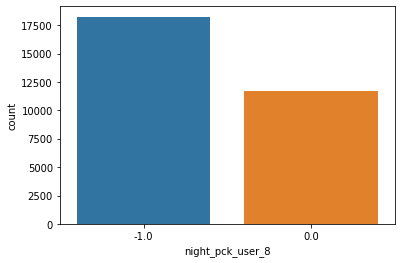

-1.0    18238
 0.0    11741
Name: night_pck_user_8, dtype: int64


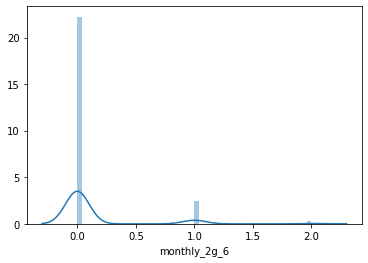

count    29979.000000
mean         0.123620
std          0.365459
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: monthly_2g_6, dtype: float64


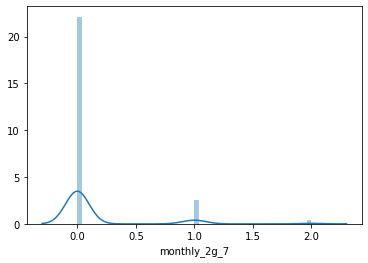

count    29979.000000
mean         0.129924
std          0.377539
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: monthly_2g_7, dtype: float64


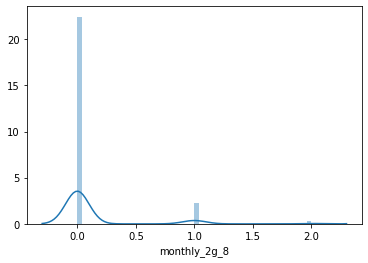

count    29979.000000
mean         0.112812
std          0.347713
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: monthly_2g_8, dtype: float64


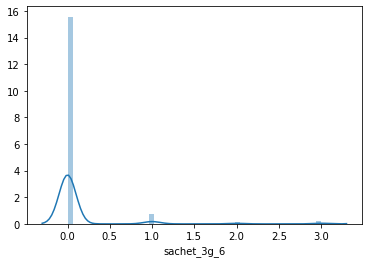

count    29979.000000
mean         0.100304
std          0.427528
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: sachet_3g_6, dtype: float64


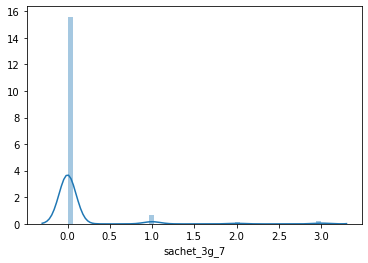

count    29979.000000
mean         0.103239
std          0.442786
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: sachet_3g_7, dtype: float64


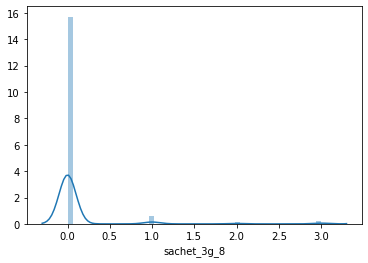

count    29979.000000
mean         0.093966
std          0.431060
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: sachet_3g_8, dtype: float64


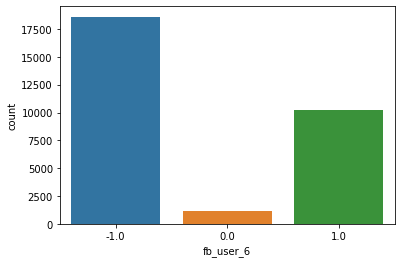

-1.0    18592
 1.0    10221
 0.0     1166
Name: fb_user_6, dtype: int64


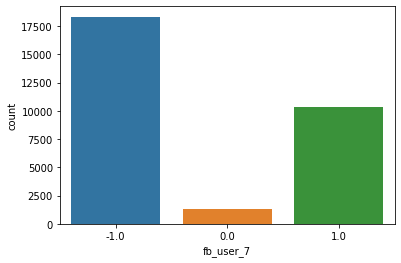

-1.0    18327
 1.0    10368
 0.0     1284
Name: fb_user_7, dtype: int64


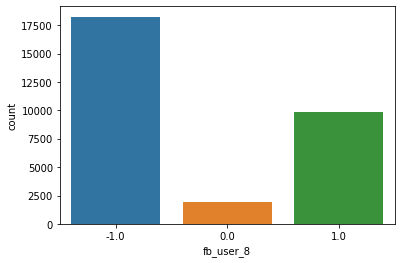

-1.0    18238
 1.0     9831
 0.0     1910
Name: fb_user_8, dtype: int64


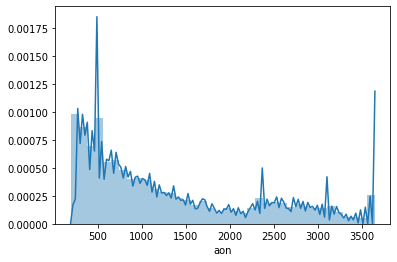

count    29979.000000
mean      1263.461223
std        973.137375
min        189.000000
25%        480.000000
50%        914.000000
75%       1923.500000
max       3651.000000
Name: aon, dtype: float64


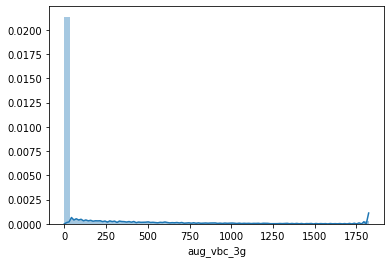

count    29979.000000
mean       120.468609
std        318.585454
min          0.000000
25%          0.000000
50%          0.000000
75%          1.600000
max       1822.698400
Name: aug_vbc_3g, dtype: float64


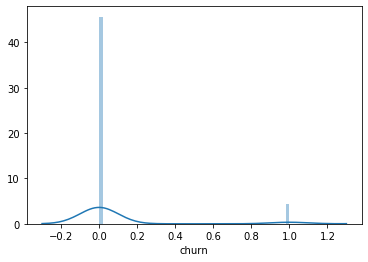

count    29979.00000
mean         0.08636
std          0.28090
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: churn, dtype: float64


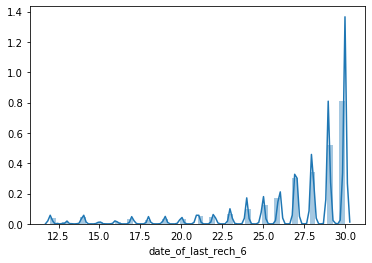

count    29979.000000
mean        26.867274
std          4.068977
min         12.000000
25%         26.000000
50%         28.000000
75%         30.000000
max         30.000000
Name: date_of_last_rech_6, dtype: float64


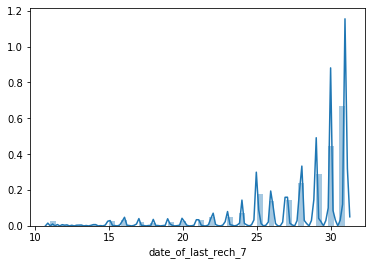

count    29979.000000
mean        27.558858
std          4.207741
min         11.000000
25%         26.000000
50%         29.000000
75%         31.000000
max         31.000000
Name: date_of_last_rech_7, dtype: float64


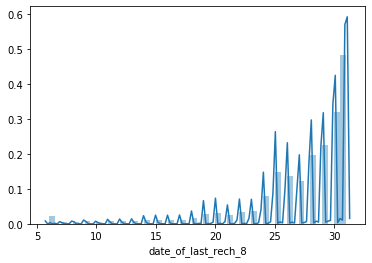

count    29979.000000
mean        27.013443
std          4.971570
min          6.000000
25%         25.000000
50%         29.000000
75%         30.000000
max         31.000000
Name: date_of_last_rech_8, dtype: float64


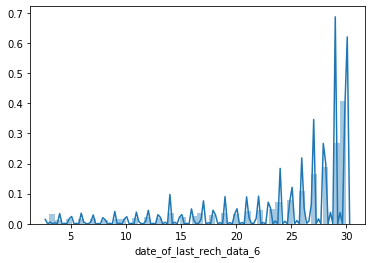

count    29979.000000
mean        24.155075
std          7.091503
min          3.000000
25%         21.000000
50%         27.000000
75%         29.000000
max         30.000000
Name: date_of_last_rech_data_6, dtype: float64


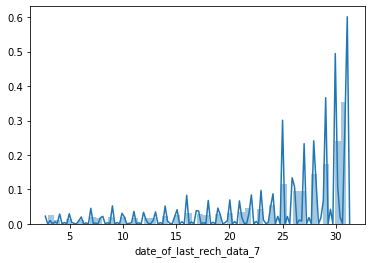

count    29979.000000
mean        24.739985
std          7.260009
min          3.000000
25%         22.000000
50%         28.000000
75%         30.000000
max         31.000000
Name: date_of_last_rech_data_7, dtype: float64


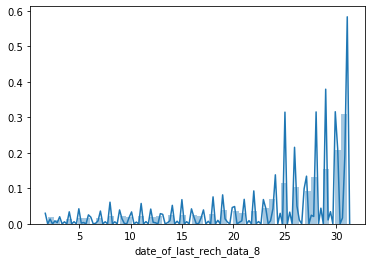

count    29979.000000
mean        24.131659
std          7.605296
min          2.000000
25%         21.000000
50%         27.000000
75%         30.000000
max         31.000000
Name: date_of_last_rech_data_8, dtype: float64


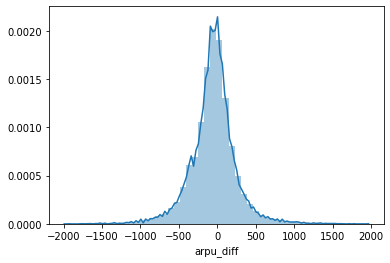

count    29979.000000
mean       -54.406070
std        296.627987
min      -1991.549890
25%       -193.421000
50%        -45.089500
75%         89.438250
max       1966.171360
Name: arpu_diff, dtype: float64


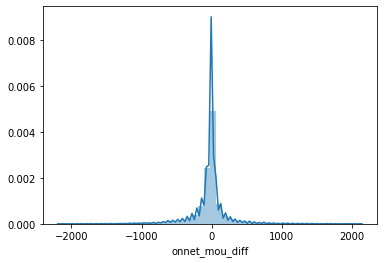

count    29979.000000
mean       -32.331723
std        274.208932
min      -2193.726800
25%        -71.902500
50%         -8.715000
75%         28.415000
max       2146.095800
Name: onnet_mou_diff, dtype: float64


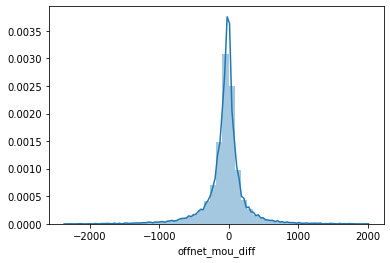

count    29979.000000
mean       -46.765427
std        299.778313
min      -2369.168500
25%       -126.332500
50%        -23.330000
75%         54.122500
max       2014.383000
Name: offnet_mou_diff, dtype: float64


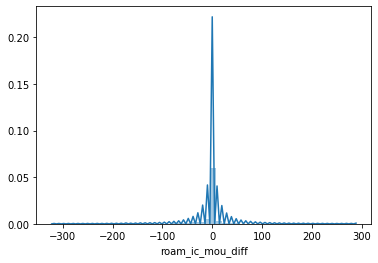

count    29979.000000
mean        -2.003993
std         39.966539
min       -322.148900
25%          0.000000
50%          0.000000
75%          0.000000
max        288.536400
Name: roam_ic_mou_diff, dtype: float64


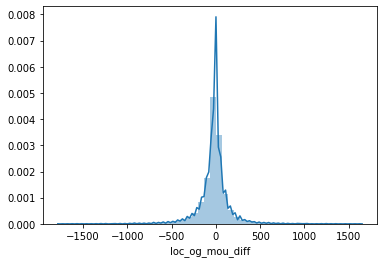

count    29979.000000
mean       -20.929031
std        184.920893
min      -1785.131300
25%        -72.782500
50%         -9.405000
75%         34.870000
max       1651.288800
Name: loc_og_mou_diff, dtype: float64


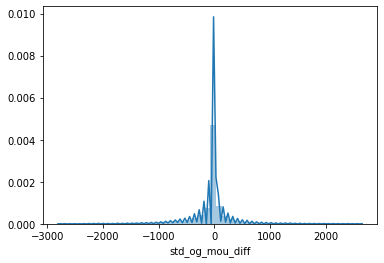

count    29979.000000
mean       -52.204040
std        386.150862
min      -2810.206800
25%        -90.537500
50%         -2.260000
75%         19.972500
max       2656.733000
Name: std_og_mou_diff, dtype: float64


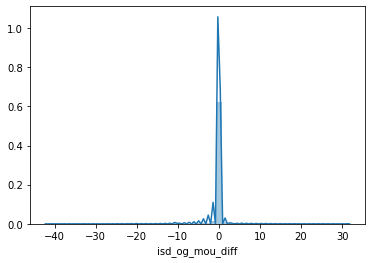

count    29979.000000
mean        -0.251115
std          3.012306
min        -41.973200
25%          0.000000
50%          0.000000
75%          0.000000
max         31.531800
Name: isd_og_mou_diff, dtype: float64


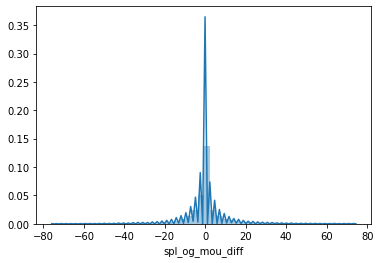

count    29979.000000
mean         0.102612
std         11.194148
min        -75.649200
25%         -2.625000
50%          0.000000
75%          1.630000
max         74.209800
Name: spl_og_mou_diff, dtype: float64


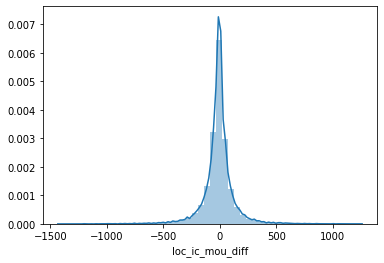

count    29979.000000
mean        -9.973345
std        145.110111
min      -1432.676500
25%        -53.957500
50%         -6.105000
75%         36.982500
max       1260.737600
Name: loc_ic_mou_diff, dtype: float64


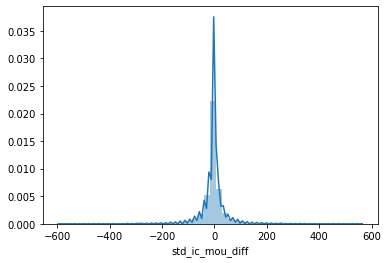

count    29979.000000
mean        -4.009866
std         58.733132
min       -597.537800
25%        -14.335000
50%         -1.320000
75%          6.847500
max        564.345000
Name: std_ic_mou_diff, dtype: float64


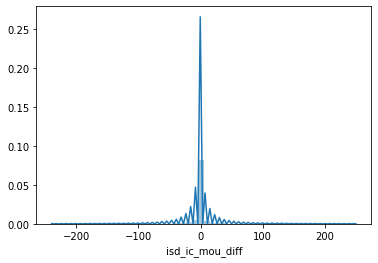

count    29979.000000
mean        -0.126579
std         22.067622
min       -239.391800
25%          0.000000
50%          0.000000
75%          0.000000
max        250.013400
Name: isd_ic_mou_diff, dtype: float64


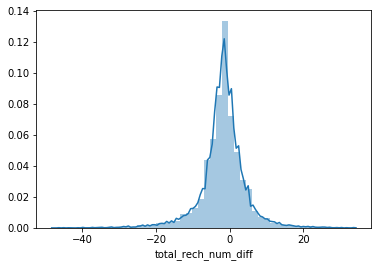

count    29979.000000
mean        -1.789336
std          6.275418
min        -48.000000
25%         -4.000000
50%         -1.500000
75%          1.000000
max         34.000000
Name: total_rech_num_diff, dtype: float64


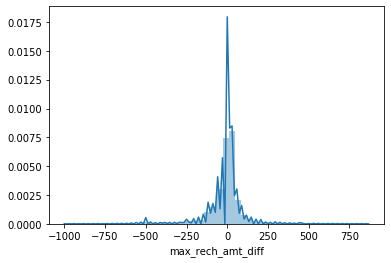

count    29979.000000
mean       -10.754311
std        115.530175
min      -1000.000000
25%        -34.250000
50%          0.000000
75%         25.000000
max        867.500000
Name: max_rech_amt_diff, dtype: float64


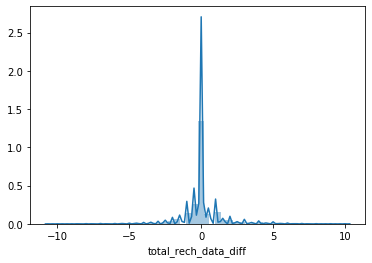

count    29979.000000
mean         0.030054
std          1.408676
min        -10.500000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: total_rech_data_diff, dtype: float64


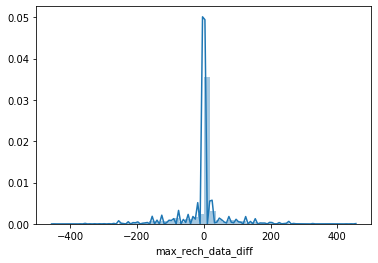

count    29979.000000
mean        -2.318056
std         64.705494
min       -455.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        455.000000
Name: max_rech_data_diff, dtype: float64


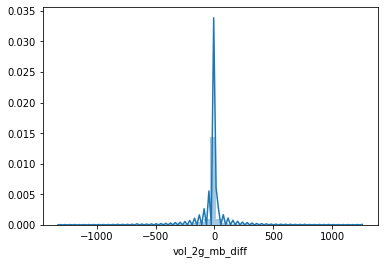

count    29979.000000
mean        -9.266441
std        161.896477
min      -1331.297700
25%         -0.587500
50%          0.000000
75%          0.000000
max       1257.791000
Name: vol_2g_mb_diff, dtype: float64


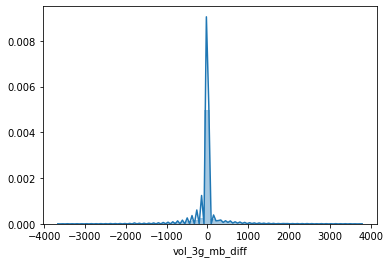

count    29979.000000
mean         2.516832
std        433.954504
min      -3665.940100
25%          0.000000
50%          0.000000
75%          0.000000
max       3791.762200
Name: vol_3g_mb_diff, dtype: float64


In [35]:
#Univariate Analysis of all columns
for i in df3.columns:
    univariate(df3[i])

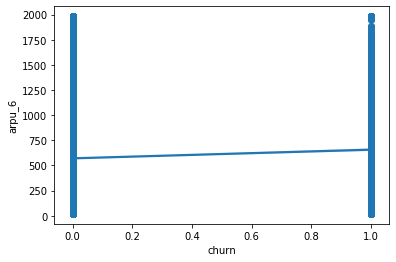

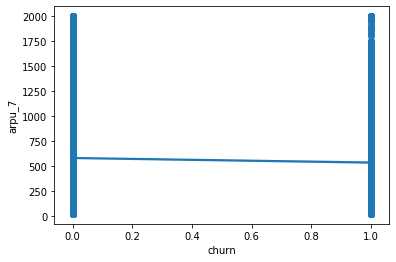

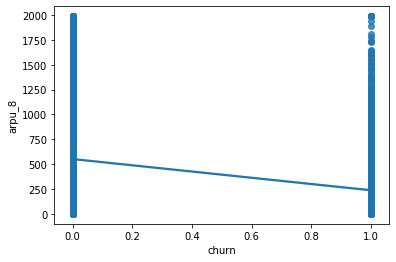

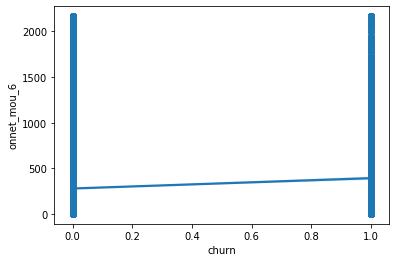

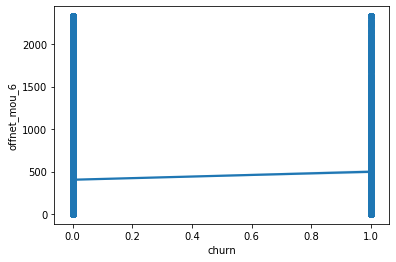

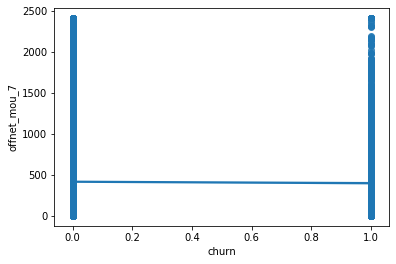

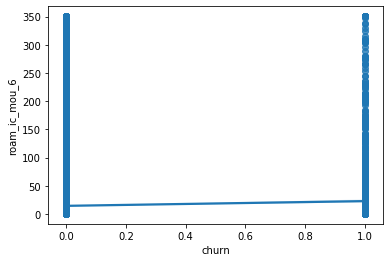

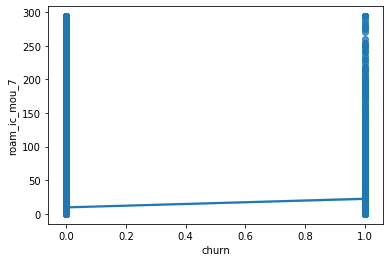

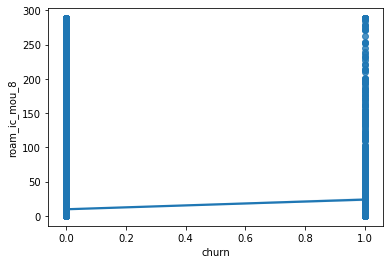

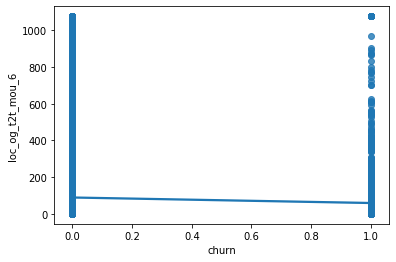

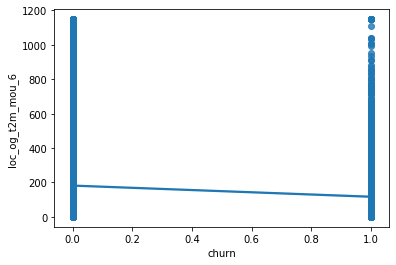

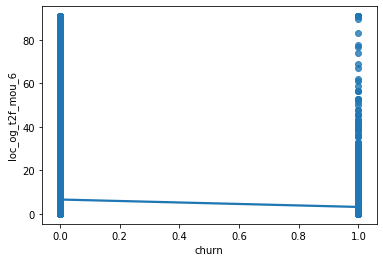

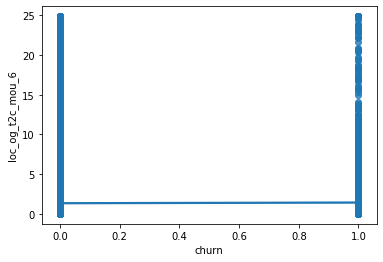

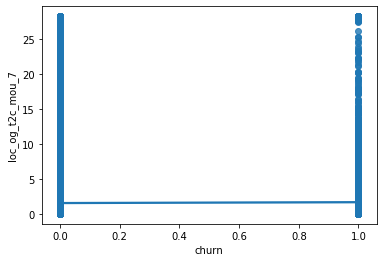

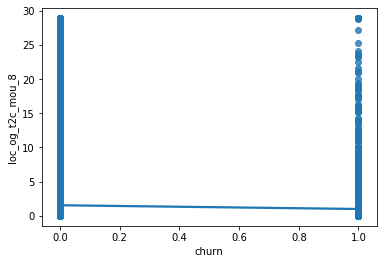

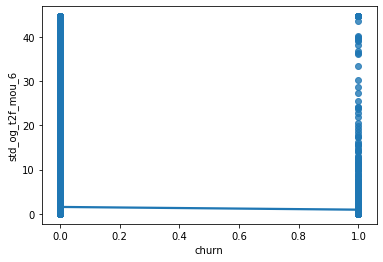

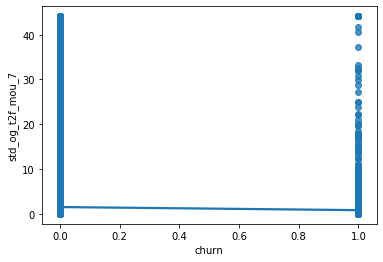

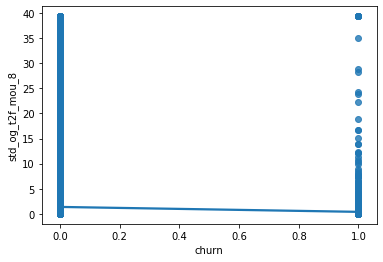

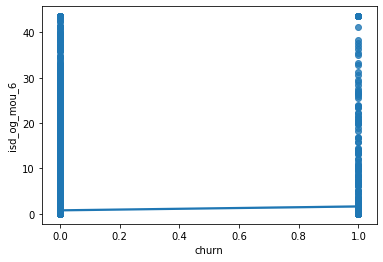

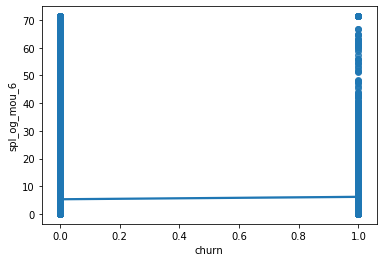

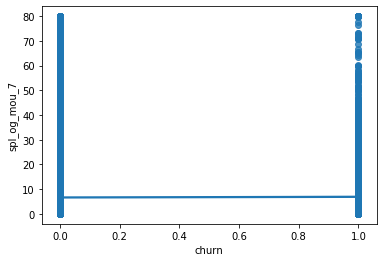

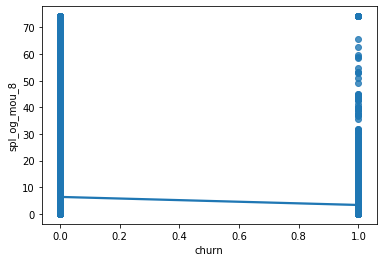

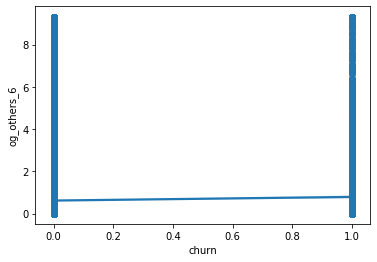

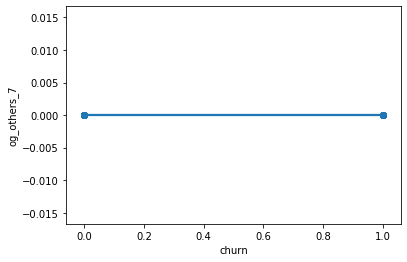

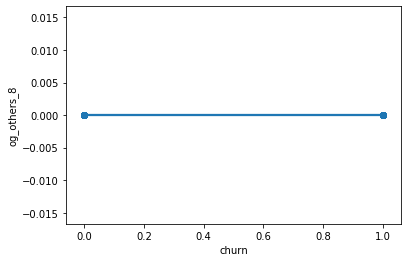

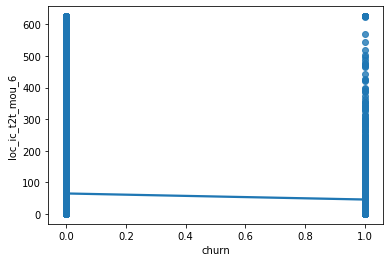

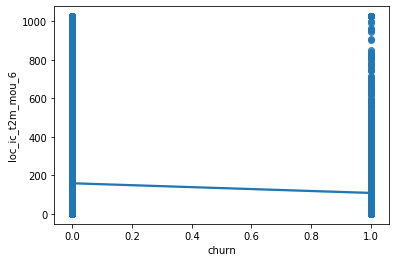

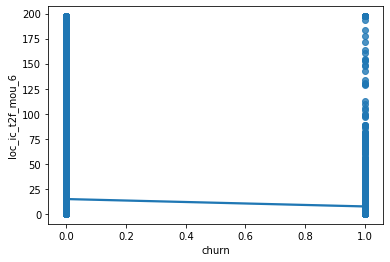

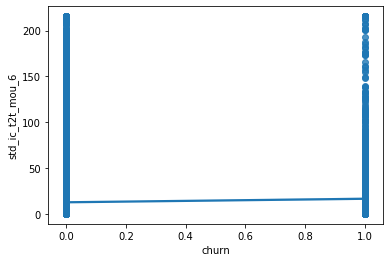

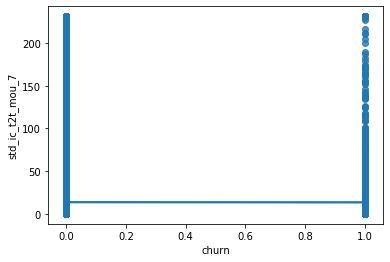

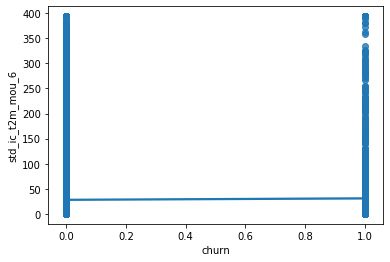

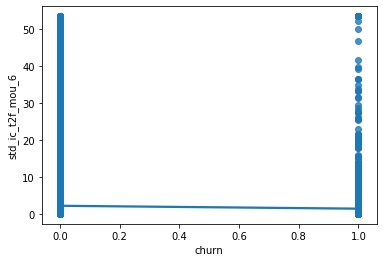

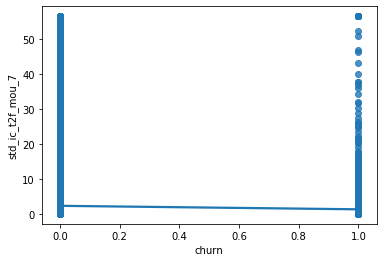

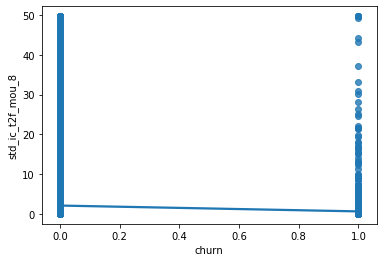

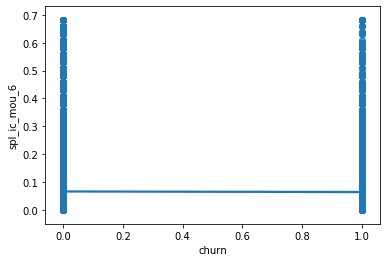

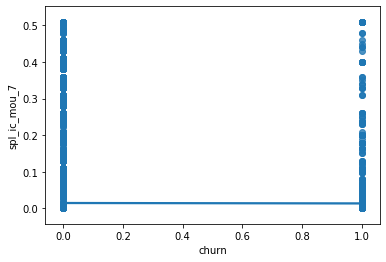

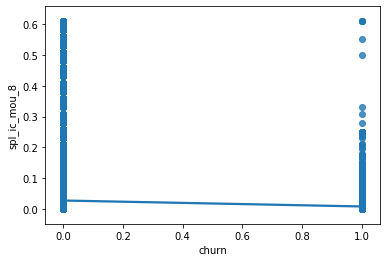

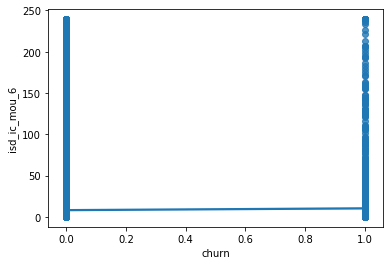

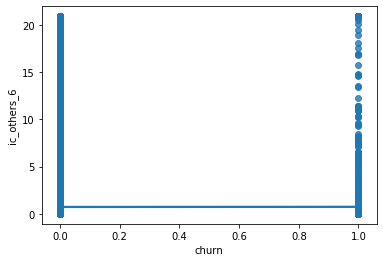

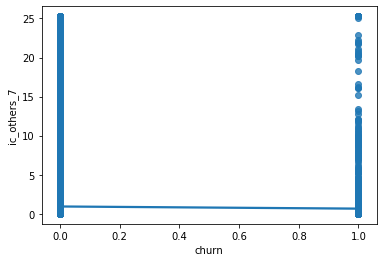

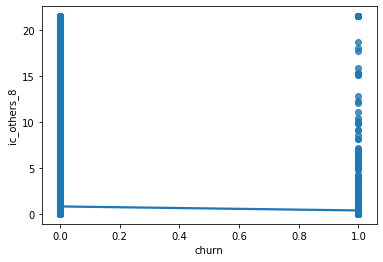

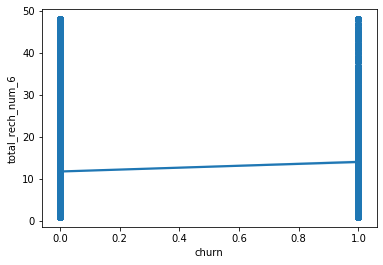

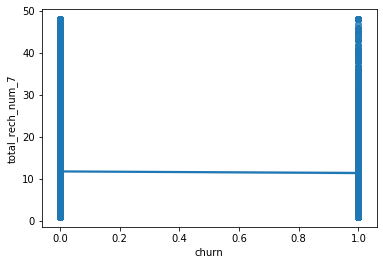

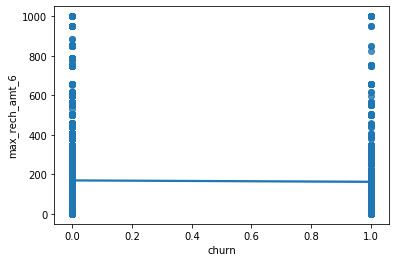

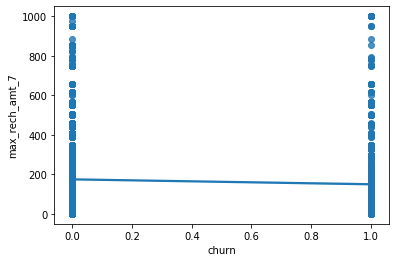

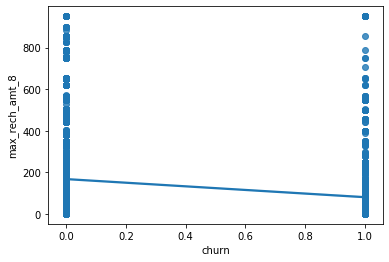

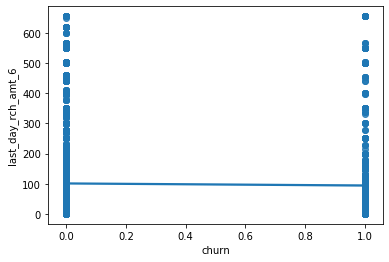

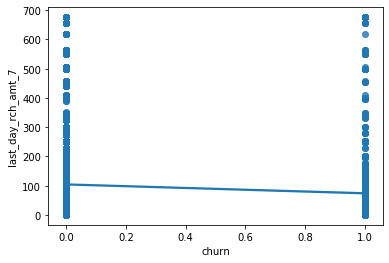

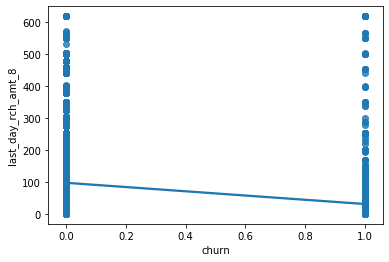

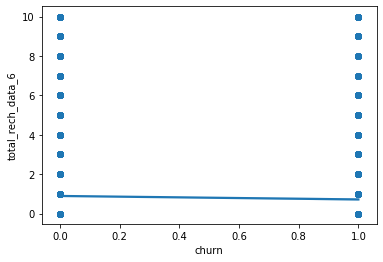

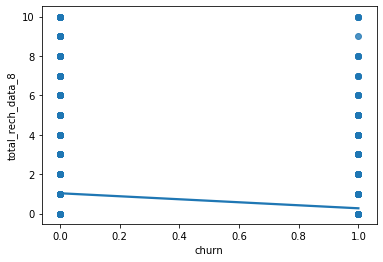

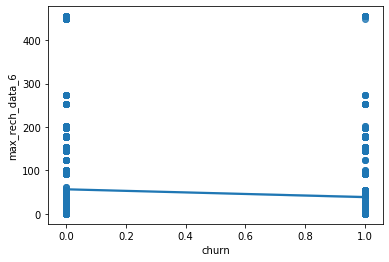

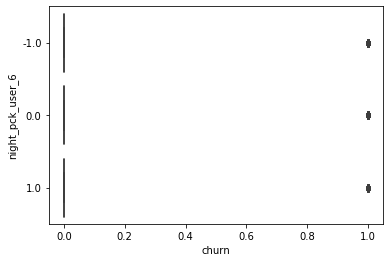

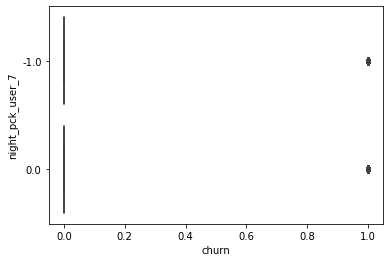

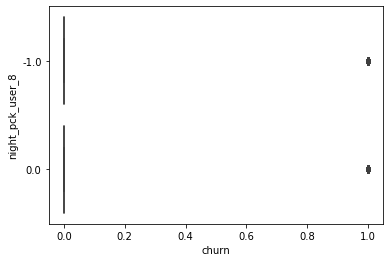

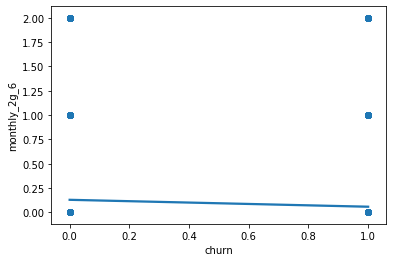

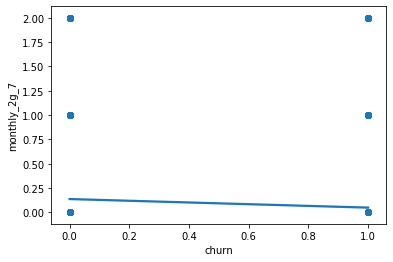

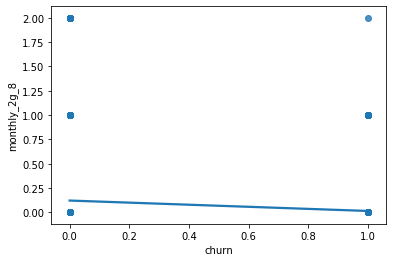

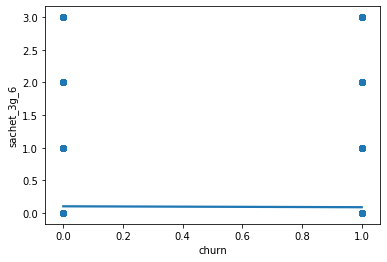

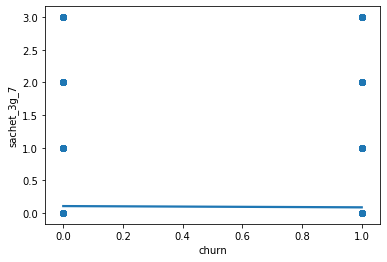

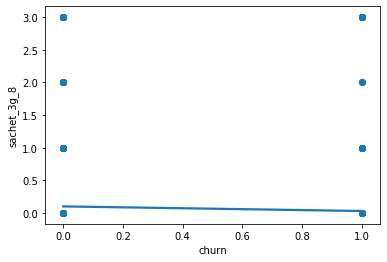

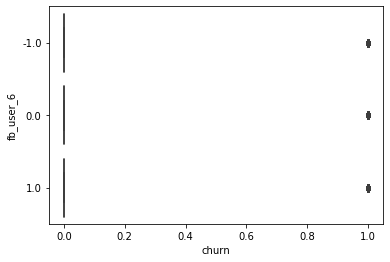

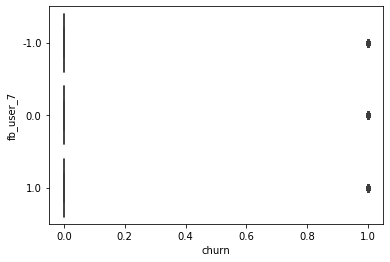

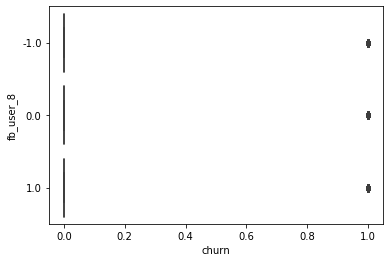

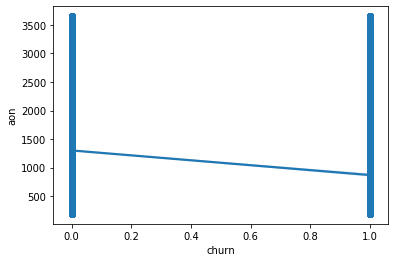

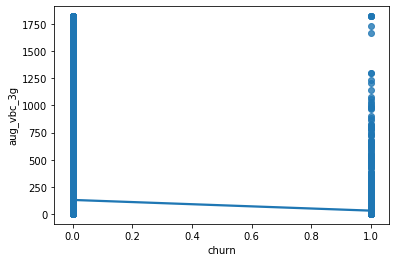

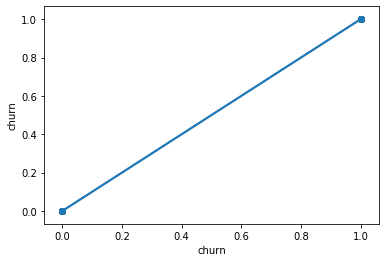

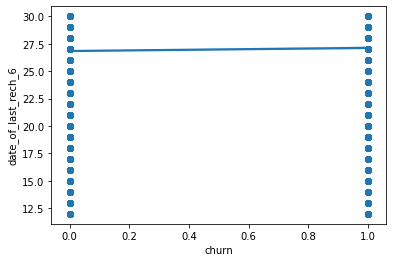

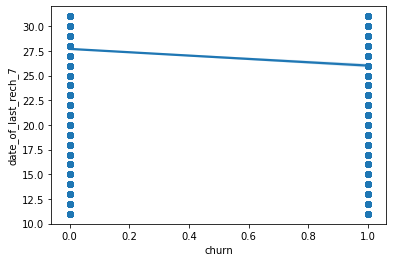

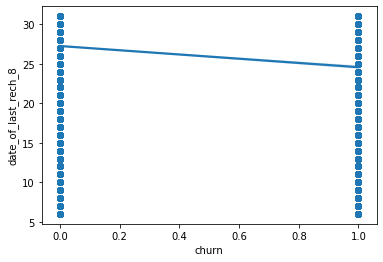

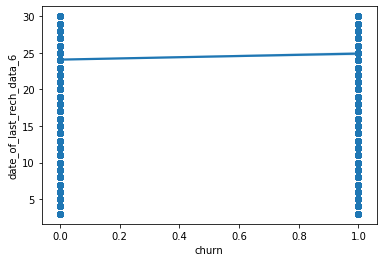

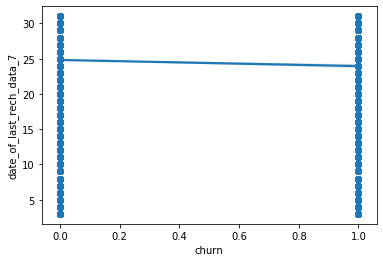

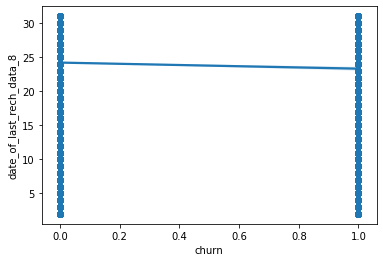

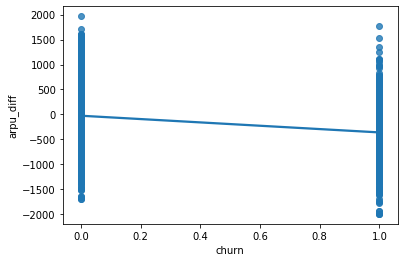

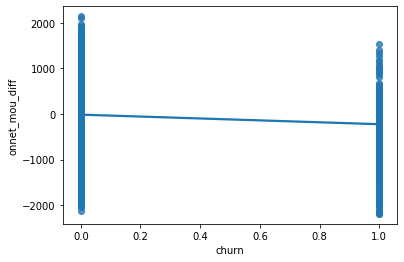

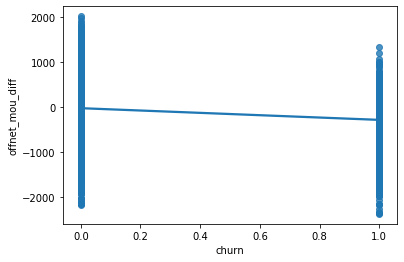

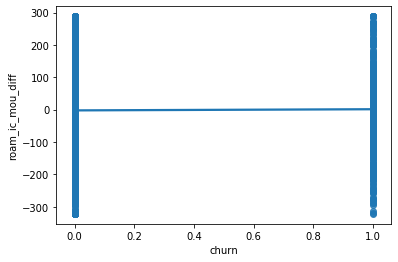

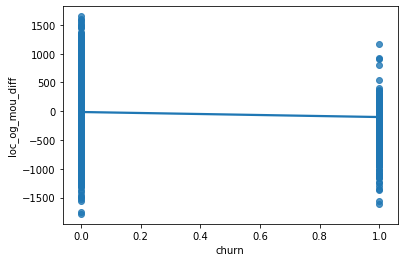

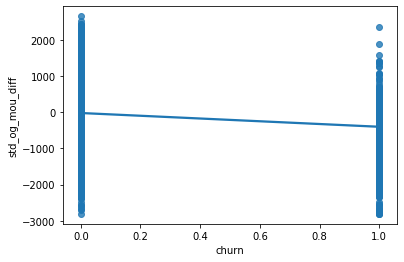

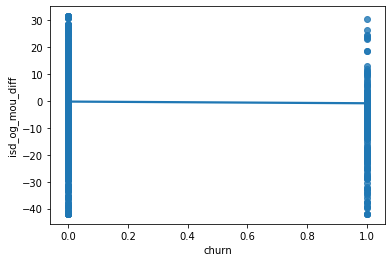

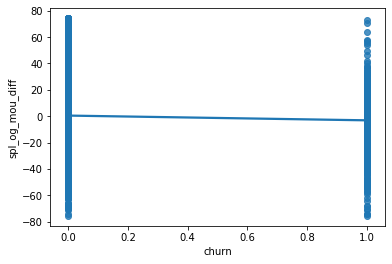

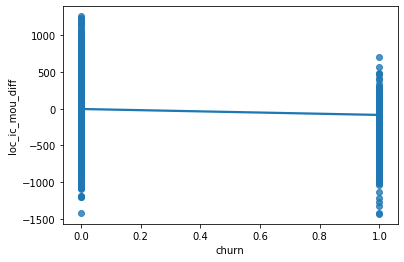

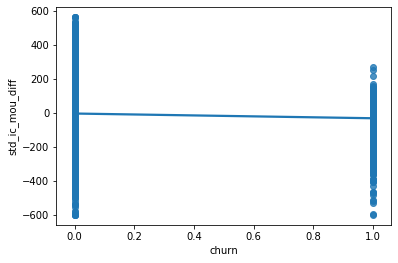

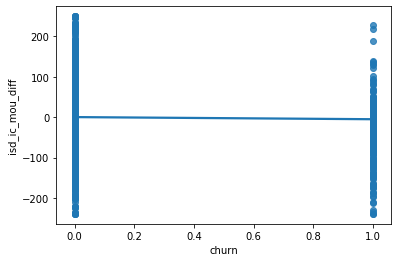

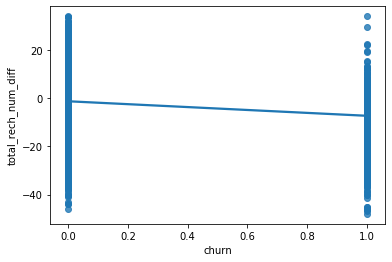

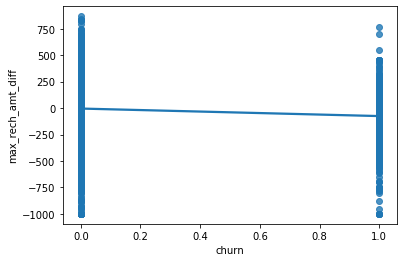

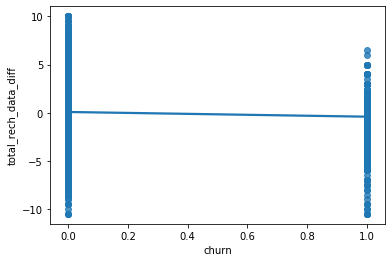

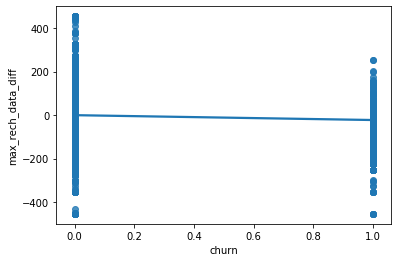

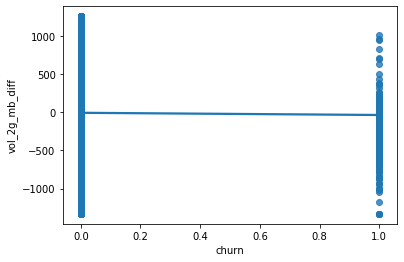

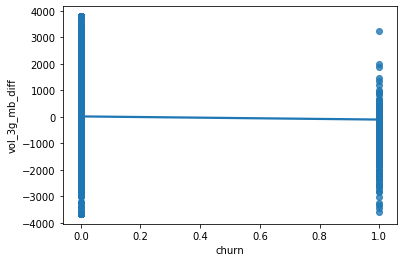

In [36]:
#Bivariate Analysis of all columns
for i in df3.columns:    
    bivariate(df3['churn'], df3[i])

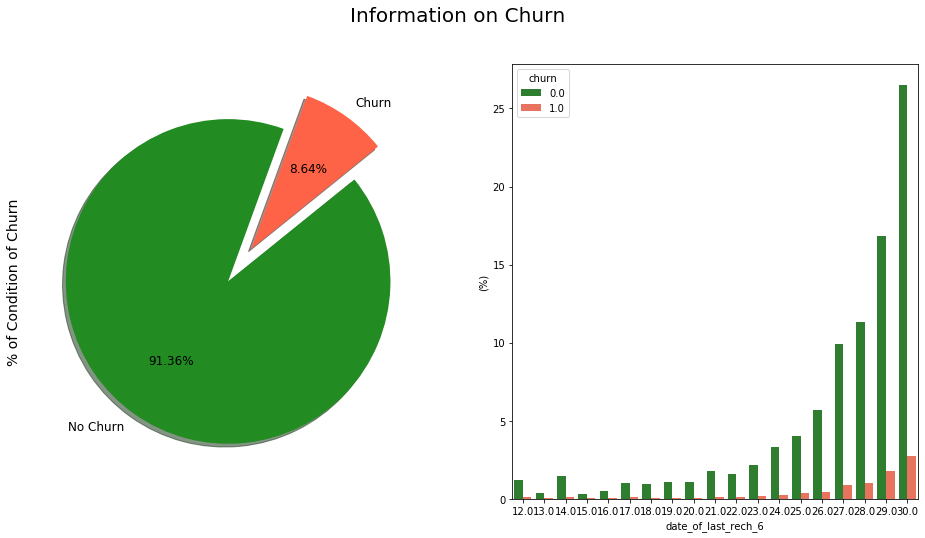

In [37]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

df3["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)

palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=df3, palette=palette, estimator=lambda x: len(x) / len(df3) * 100)
ax[1].set(ylabel="(%)")
plt.show()

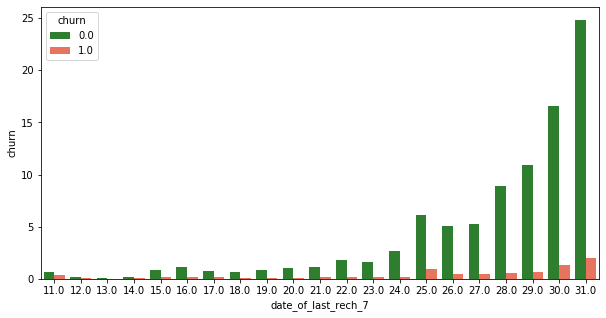

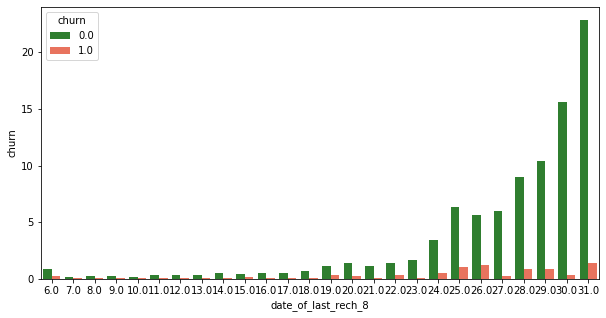

In [38]:
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=df3, palette=palette, 
            estimator=lambda x: len(x) / len(df3) * 100)

plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=df3, palette=palette, 
            estimator=lambda x: len(x) / len(df3) * 100)
plt.show()

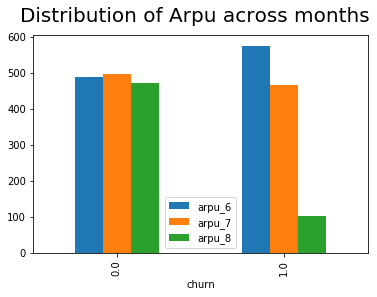

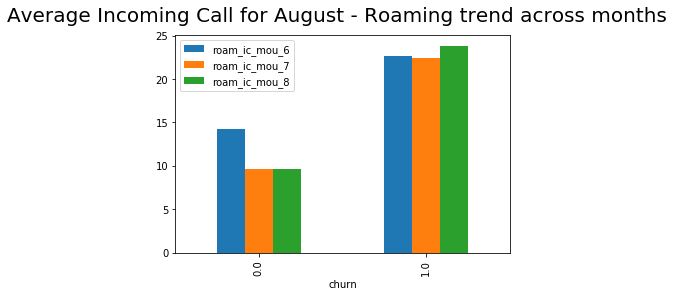

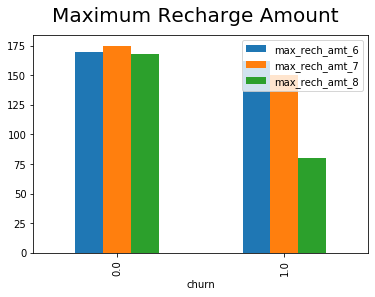

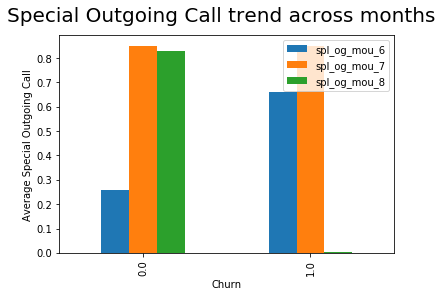

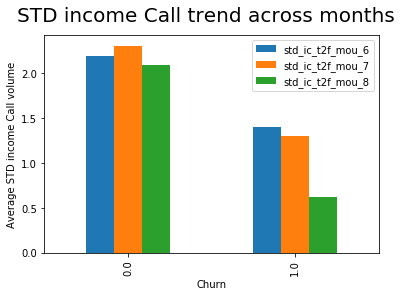

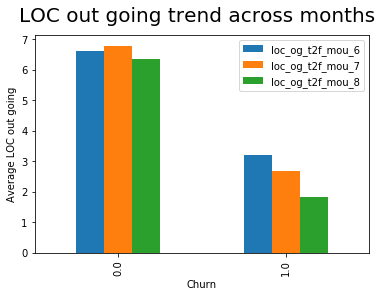

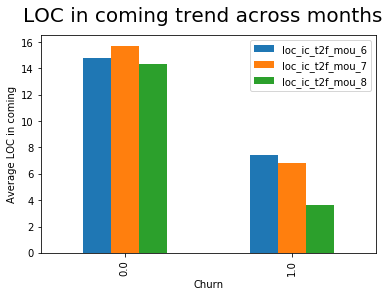

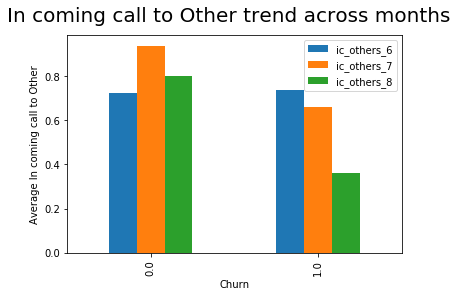

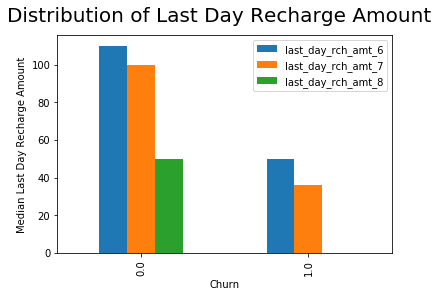

In [39]:
df2['churn'] = df2['churn'].astype('object', copy = False)
df_sample = df2.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

df_sample = df2.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)
plt.show()

df_sample = df2.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()


df_sample = df2.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()


df_sample = df2.groupby(['churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call volume")
plt.show()


df_sample = df2.groupby(['churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC out going trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC out going")
plt.show()

df_sample = df2.groupby(['churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC in coming trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC in coming")
plt.show()

df_sample = df2.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()
df_sample.plot.bar()
plt.suptitle('In coming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()

df2['churn'] = df2['churn'].astype('object', copy = False)
df_sample = df2.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")
plt.show()

In [40]:
# Putting feature variable to X
X = df3.drop(['churn'],axis=1)
# Putting response variable to y
y = df3['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (20985, 89)
Number transactions y_train dataset:  (20985,)
Number transactions X_test dataset:  (8994, 89)
Number transactions y_test dataset:  (8994,)


In [41]:
type(X_test)

pandas.core.frame.DataFrame

## Scaling using MinMax Scaler

In [42]:
#Scaling the values uisng MinMax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Importing matplotlib and seaborn
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

# Let's see the correlation matrix 
#plt.figure(figsize = (20,10))        # Size of the figure
#sns.heatmap(df3.corr(),annot = True)
#plt.show()

#### Creating the Dataframes as and when needed

In [44]:
X_train_df=pd.DataFrame(data = X_train, columns = X.columns[:])

In [45]:
X_test_df=pd.DataFrame(data = X_test, columns = X.columns[:])

In [46]:
y_train_df=pd.DataFrame(data = y_train, columns =['churn'])

In [47]:
y_test_df=pd.DataFrame(data = y_test, columns = ['churn'])

# Creating initial RFE for Feature Elimination 

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 16)             # running RFE with 16 variables as output
rfe = rfe.fit(X_train_df, y_train_df)

#list(zip(X_train.columns, rfe.support_, rfe.ranking_))
list(zip(X_train_df.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 53),
 ('arpu_7', False, 12),
 ('arpu_8', False, 11),
 ('onnet_mou_6', False, 66),
 ('offnet_mou_6', False, 26),
 ('offnet_mou_7', False, 27),
 ('roam_ic_mou_6', False, 9),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 44),
 ('loc_og_t2t_mou_6', False, 7),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2f_mou_6', False, 39),
 ('loc_og_t2c_mou_6', False, 34),
 ('loc_og_t2c_mou_7', False, 57),
 ('loc_og_t2c_mou_8', False, 18),
 ('std_og_t2f_mou_6', False, 67),
 ('std_og_t2f_mou_7', False, 72),
 ('std_og_t2f_mou_8', False, 22),
 ('isd_og_mou_6', False, 8),
 ('spl_og_mou_6', False, 61),
 ('spl_og_mou_7', False, 43),
 ('spl_og_mou_8', False, 17),
 ('og_others_6', False, 62),
 ('og_others_7', False, 73),
 ('og_others_8', False, 74),
 ('loc_ic_t2t_mou_6', False, 2),
 ('loc_ic_t2m_mou_6', True, 1),
 ('loc_ic_t2f_mou_6', False, 4),
 ('std_ic_t2t_mou_6', False, 71),
 ('std_ic_t2t_mou_7', False, 59),
 ('std_ic_t2m_mou_6', False, 25),
 ('std_ic_t2f_mou_6', False, 41),
 ('std

# Creating Logistic Regression model with RFE

In [49]:
#Building a basic logistic regression model
col = X_train_df.columns[rfe.support_]

X_train_rfe=X_train_df[col]
model_lrrfe = logreg.fit(X_train_rfe,y_train)
pred_probs_test = model_lrrfe.predict_proba(X_test_df[col])[:,1]
roc_auc_score(y_test, pred_probs_test)


0.8746181489779676

In [50]:
#Making prediction on the test data
pred_test = model_lrrfe.predict_proba(X_test_df[col])
y_pred_default = model_lrrfe.predict(X_test_df[col])
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6668 1511]
 [ 148  667]]
0.8155436957971981


In [51]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [52]:

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

In [53]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [54]:
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8746181489779676


In [55]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

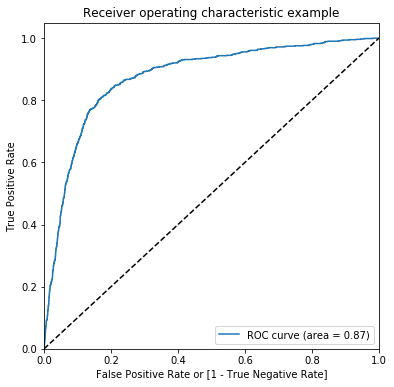

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.028414,1,0,0,0,0,0,0,0,0,0
1,0.0,0.065761,1,0,0,0,0,0,0,0,0,0
2,0.0,0.213824,1,1,1,0,0,0,0,0,0,0
3,0.0,0.223982,1,1,1,0,0,0,0,0,0,0
4,0.0,0.348227,1,1,1,1,0,0,0,0,0,0


In [56]:
#Plotting ROC Curve
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

In [57]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.311763  0.245629  0.975460
0.2   0.2  0.482989  0.436728  0.947239
0.3   0.3  0.629976  0.600929  0.921472
0.4   0.4  0.741272  0.727840  0.876074
0.5   0.5  0.815544  0.815259  0.818405
0.6   0.6  0.860351  0.871133  0.752147
0.7   0.7  0.887592  0.915882  0.603681
0.8   0.8  0.903380  0.949749  0.438037
0.9   0.9  0.909718  0.979215  0.212270


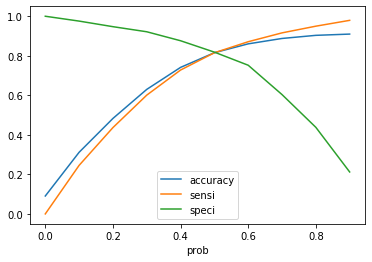

In [58]:
#Plotting the data in a line plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [59]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])

In [60]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5034501179181036]


In [61]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)
y_pred_final.churn.value_counts()

0.0    8179
1.0     815
Name: churn, dtype: int64

In [62]:
#Creating confusion matrix
confusion = confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6611, 1568],
       [ 143,  672]], dtype=int64)

In [63]:
#Model Evaluation
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('Precision: ', TP / float(TP+FP))
# Negative predictive value
print('Recall: ',TN / float(TN+ FN))
## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8155436957971981
Sensitivity:  0.8245398773006135
Specificity:  0.8082895219464482
False postive rate:  0.1917104780535518
Precision:  0.3
Recall:  0.9788273615635179
Misclassification Rate:  0.1902379364020458


# Tuning VIF

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_df[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_df[col].values, i) for i in range(X_train_df[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,std_og_mou_diff,592.06
7,offnet_mou_diff,478.52
6,onnet_mou_diff,427.09
8,loc_og_mou_diff,393.06
10,loc_ic_mou_diff,126.86
11,std_ic_mou_diff,99.40
12,isd_ic_mou_diff,94.04
15,vol_3g_mb_diff,90.83
13,total_rech_num_diff,80.66
14,max_rech_data_diff,67.80


In [65]:
print(col)

Index(['roam_ic_mou_7', 'loc_og_t2m_mou_6', 'loc_ic_t2m_mou_6',
       'last_day_rch_amt_8', 'monthly_2g_8', 'date_of_last_rech_8',
       'onnet_mou_diff', 'offnet_mou_diff', 'loc_og_mou_diff',
       'std_og_mou_diff', 'loc_ic_mou_diff', 'std_ic_mou_diff',
       'isd_ic_mou_diff', 'total_rech_num_diff', 'max_rech_data_diff',
       'vol_3g_mb_diff'],
      dtype='object')


In [66]:
# Dropping the PhoneService column 'arpu_6','arpu_7','arpu_8'
col = col.drop(['onnet_mou_diff','std_og_mou_diff','vol_3g_mb_diff','max_rech_data_diff','std_ic_mou_diff','isd_ic_mou_diff','total_rech_num_diff','loc_ic_mou_diff','loc_og_mou_diff','offnet_mou_diff'], 1)

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_df[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_df[col].values, i) for i in range(X_train_df[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_og_t2m_mou_6,2.63
2,loc_ic_t2m_mou_6,2.63
5,date_of_last_rech_8,2.17
3,last_day_rch_amt_8,1.61
4,monthly_2g_8,1.11
0,roam_ic_mou_7,1.07


### Recreating the Logistic model again with uncorrelated Features

In [68]:
#Building a basic logistic regression model
#col = X_train_df.columns[rfe.support_]

X_train_rfe=X_train_df[col]
model_lrrfe = logreg.fit(X_train_rfe,y_train)
pred_probs_test = model_lrrfe.predict_proba(X_test_df[col])[:,1]
roc_auc_score(y_test, pred_probs_test)

0.8192380306590948

In [69]:
#Making prediction on the test data
pred_test = model_lrrfe.predict_proba(X_test_df[col])
y_pred_default = model_lrrfe.predict(X_test_df[col])
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

[[6080 2099]
 [ 164  651]]
0.7483878140982877


In [70]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8192380306590948


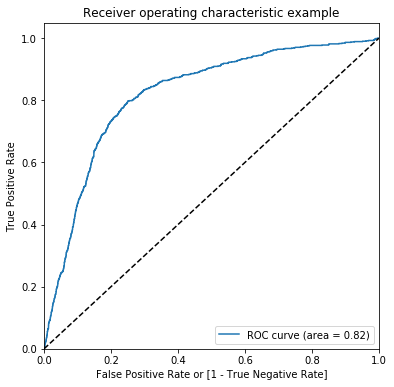

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.117480,1,1,0,0,0,0,0,0,0,0
1,0.0,0.173873,1,1,0,0,0,0,0,0,0,0
2,0.0,0.236974,1,1,1,0,0,0,0,0,0,0
3,0.0,0.310787,1,1,1,1,0,0,0,0,0,0
4,0.0,0.498989,1,1,1,1,1,0,0,0,0,0


In [71]:
#Plotting ROC Curve
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.203580  0.126055  0.981595
0.2   0.2  0.314321  0.248930  0.970552
0.3   0.3  0.449300  0.401027  0.933742
0.4   0.4  0.577718  0.546766  0.888344
0.5   0.5  0.748388  0.743367  0.798773
0.6   0.6  0.836224  0.861475  0.582822
0.7   0.7  0.871915  0.924318  0.346012
0.8   0.8  0.894152  0.965766  0.175460
0.9   0.9  0.903714  0.985206  0.085890


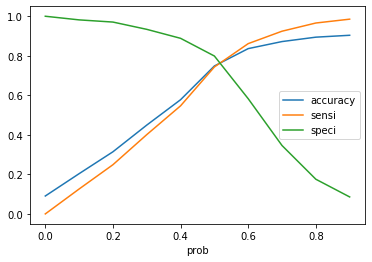

In [72]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

#Plotting the data in a line plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [73]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5159568109855946]


In [74]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)
y_pred_final.churn.value_counts()

0.0    8179
1.0     815
Name: churn, dtype: int64

In [75]:
#Creating confusion matrix
confusion = confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[5921, 2258],
       [ 155,  660]], dtype=int64)

In [76]:

#Model Evaluation
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('Precision: ', TP / float(TP+FP))
# Negative predictive value
print('Recall: ',TN / float(TN+ FN))
## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.7483878140982877
Sensitivity:  0.8098159509202454
Specificity:  0.723927130456046
False postive rate:  0.27607286954395405
Precision:  0.22618231665524333
Recall:  0.9744897959183674
Misclassification Rate:  0.268289971091839


With just 6 features the model here is avoiding overfitting and is highly robust with and accuracy of .75

# Feature Reduction with PCA

In [77]:
# Since there is class imbalance, we have to handle it
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

#Doing the PCA on the train data
pca.fit(X_train)

colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.017785,-0.021668,0.022229,0.276114,0.198036,0.167049,-0.014406,-0.156047,0.028693,0.043244,arpu_6
1,0.024478,-0.053613,0.033544,0.322854,0.098597,0.009017,0.161002,-0.089393,-0.084588,-0.104590,arpu_7
2,0.032657,-0.072988,0.108059,0.306198,0.110917,-0.113726,0.210845,-0.043632,-0.083200,0.005141,arpu_8
3,-0.029138,-0.069845,-0.028173,0.082611,0.053809,0.159647,0.018349,-0.066431,0.047680,0.021928,onnet_mou_6
4,-0.022785,-0.054322,0.029379,0.260444,0.122728,0.181447,-0.064034,-0.098451,-0.125836,0.099225,offnet_mou_6
5,-0.021465,-0.073291,0.035640,0.261211,0.084820,0.078890,0.063900,-0.060979,-0.187722,-0.012741,offnet_mou_7
6,0.000630,0.012925,0.021410,0.031629,0.000200,-0.014293,0.091312,-0.076434,0.023337,-0.042682,roam_ic_mou_6
7,-0.000185,0.016774,0.019061,0.034457,0.009247,0.002733,0.070133,-0.081230,0.029945,-0.026388,roam_ic_mou_7
8,0.002167,0.009913,0.019058,0.049395,0.010793,0.008368,0.063021,-0.076649,0.023570,-0.025363,roam_ic_mou_8
9,0.006788,0.007543,0.022800,0.095417,0.045675,0.052290,-0.127261,0.019938,-0.002324,0.065530,loc_og_t2t_mou_6


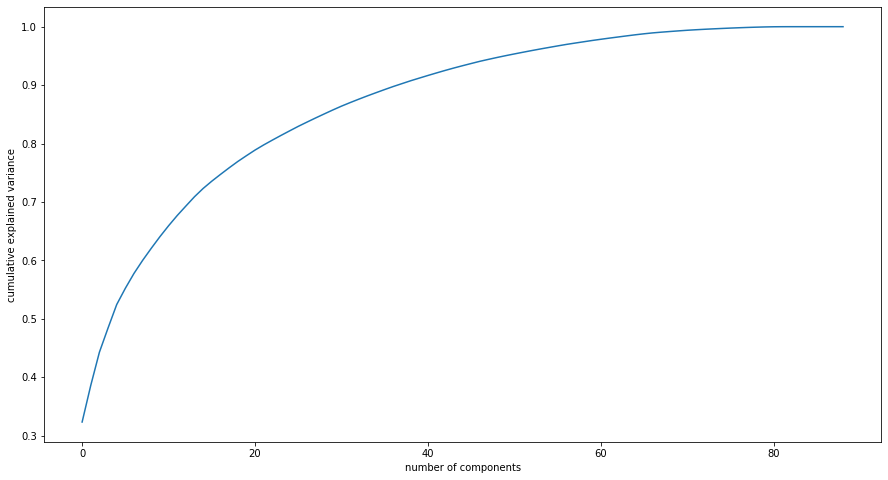

In [78]:
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [79]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      32.32
1      38.59
2      44.27
3      48.42
4      52.43
5      55.22
6      57.76
7      60.00
8      62.06
9      64.05
10     65.92
11     67.67
12     69.29
13     70.89
14     72.31
15     73.55
16     74.71
17     75.83
18     76.92
19     77.91
20     78.88
21     79.76
22     80.58
23     81.38
24     82.17
25     82.94
26     83.66
27     84.37
28     85.06
29     85.74
30     86.40
31     87.01
32     87.59
33     88.16
34     88.71
35     89.24
36     89.77
37     90.26
38     90.74
39     91.20
40     91.65
41     92.09
42     92.52
43     92.93
44     93.32
45     93.70
46     94.07
47     94.41
48     94.73
49     95.04
50     95.34
51     95.63
52     95.91
53     96.19
54     96.45
55     96.71
56     96.96
57     97.19
58     97.42
59     97.64
60     97.85
61     98.05
62     98.24
63     98.43
64     98.62
65     98.79
66     98.94
67     99.06
68     99.18
69     99.29
70     99.39
71     99.48
72     99.56
73     99.63
74     99.70
75     99.76
76     99.82

50 components explain more than 95% of the variance.

In [80]:
pca_final = IncrementalPCA(n_components=50)
df_train_pca = pca_final.fit_transform(X_train)
df_test_pca = pca_final.transform(X_test)
df_train_pca.shape

(20985, 50)

In [81]:
#Checking the corelation of the new dataset
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("Maximum correlation:",corrmat_nodiag.max(), ", Minimum correlation: ", corrmat_nodiag.min(),)

Maximum correlation: 0.003926074775474068 , Minimum correlation:  -0.0027315920705920553


Corelations are very close to zero which means the components are not having any problem of multicolinearity

## Logistice Regression with PCA

In [82]:
#Building a basic logistic regression model
lr_pca = LogisticRegression(class_weight='balanced')
model_lrpca = lr_pca.fit(df_train_pca,y_train)
pred_probs_test = model_lrpca.predict_proba(df_test_pca)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.8781795665541785

In [83]:
#Making prediction on the test data
pred_test = model_lrpca.predict_proba(df_test_pca)
y_pred_default = model_lrpca.predict(df_test_pca)
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6762 1417]
 [ 165  650]]
0.8241049588614632


In [84]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [85]:
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8781795665541785


In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

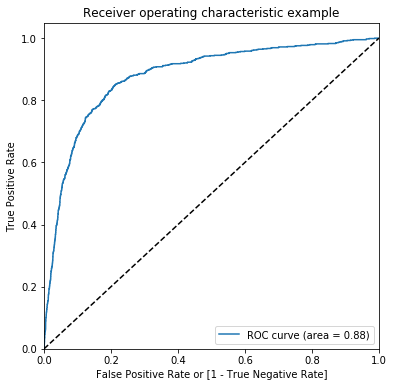

(array([0.        , 0.        , 0.        , ..., 0.99975547, 0.99987774,
        1.        ]),
 array([0.        , 0.00122699, 0.00245399, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99841488e+00, 9.98414885e-01, 9.97947060e-01, ...,
        1.57227172e-04, 1.21644956e-04, 1.01559483e-04]))

In [87]:
#Plotting ROC Curve
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.038275,1,0,0,0,0,0,0,0,0,0
1,0.0,0.171964,1,1,0,0,0,0,0,0,0,0
2,0.0,0.122448,1,1,0,0,0,0,0,0,0,0
3,0.0,0.378321,1,1,1,1,0,0,0,0,0,0
4,0.0,0.577611,1,1,1,1,1,1,0,0,0,0


In [89]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.358016  0.296858  0.971779
0.2   0.2  0.531354  0.490158  0.944785
0.3   0.3  0.662553  0.637731  0.911656
0.4   0.4  0.764065  0.753760  0.867485
0.5   0.5  0.824105  0.826751  0.797546
0.6   0.6  0.865132  0.878592  0.730061
0.7   0.7  0.890149  0.915149  0.639264
0.8   0.8  0.909050  0.949505  0.503067
0.9   0.9  0.912164  0.977014  0.261350


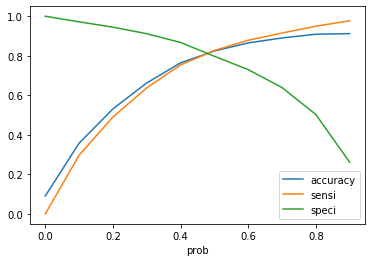

In [90]:
#Plotting the data in a line plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [91]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.4810142999566308]


Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0

In [92]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)
y_pred_final.churn.value_counts()

0.0    8179
1.0     815
Name: churn, dtype: int64

In [93]:
#Creating confusion matrix
confusion = confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6710, 1469],
       [ 158,  657]], dtype=int64)

In [94]:
#Model Evaluation
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('Precision: ', TP / float(TP+FP))
# Negative predictive value
print('Recall: ',TN / float(TN+ FN))
## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8241049588614632
Sensitivity:  0.8061349693251534
Specificity:  0.8203936911602886
False postive rate:  0.17960630883971146
Precision:  0.3090310442144873
Recall:  0.9769947582993593
Misclassification Rate:  0.18089837669557482


## Decision Tree Classifier with PCA

In [95]:
# Fitting decision tree classifier with default hyperparameters
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84      8179
         1.0       0.22      0.72      0.34       815

    accuracy                           0.75      8994
   macro avg       0.59      0.73      0.59      8994
weighted avg       0.90      0.75      0.80      8994

[[6134 2045]
 [ 231  584]]
Acuracy Score 0.7469424060484767


In [97]:
#Printing the metrics of the decisoon tree with default parameters and 5 depth
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.7469424060484767
Sensitivity:  0.7165644171779141
Specificity:  0.7499694339161267
false postive rate:  0.2500305660838733
positive predictive value:  0.2221376949410422
Negative predictive value:  0.9637077769049489
Misclassification Rate:  0.2530575939515232


The sensitivity is not good, so we tune the hyperparameters.

## Decision Tree Classifier + PCA with Hyperparameter Tuning

In [98]:
# GridSearchCV to find optimal max_depth
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [99]:
y_train.shape

(20985,)

In [100]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.109685,0.003155,0.001005,9.906285e-06,1,{'max_depth': 1},0.674053,0.659519,0.668335,0.668573,0.665714,0.667239,0.004719,38,0.670241,0.665058,0.671432,0.671372,0.662020,0.668025,0.003810
1,0.202195,0.004634,0.000997,6.278336e-06,2,{'max_depth': 2},0.661901,0.653800,0.661901,0.668335,0.655230,0.660234,0.005246,39,0.659280,0.656898,0.666250,0.669288,0.655468,0.661437,0.005398
2,0.291222,0.005416,0.001055,1.089816e-04,3,{'max_depth': 3},0.755063,0.754825,0.767453,0.772933,0.762926,0.762640,0.007038,34,0.764177,0.762569,0.771384,0.767274,0.761615,0.765404,0.003554
3,0.366675,0.005048,0.001000,3.371748e-07,4,{'max_depth': 4},0.728854,0.728854,0.798904,0.749345,0.735525,0.748296,0.026387,35,0.745830,0.738682,0.799678,0.743746,0.743686,0.754325,0.022799
4,0.443575,0.010592,0.001400,4.898625e-04,5,{'max_depth': 5},0.748868,0.740291,0.752204,0.746247,0.746962,0.746914,0.003902,36,0.770967,0.760126,0.747856,0.747260,0.753157,0.755873,0.008852


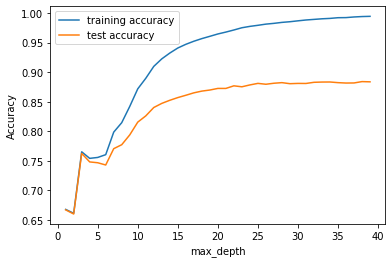

In [101]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Optimum Max Depth is 15 - 20

In [102]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [103]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.866845,0.014643,0.001401,4.900964e-04,5,{'min_samples_leaf': 5},0.849178,0.843698,0.847510,0.853943,0.850846,0.849035,0.003412,1,0.945556,0.940791,0.942876,0.945854,0.940910,0.943198,0.002179
1,0.752314,0.019956,0.001201,4.002333e-04,25,{'min_samples_leaf': 25},0.799619,0.799619,0.787467,0.786276,0.791756,0.792947,0.005744,2,0.848821,0.854301,0.823505,0.836729,0.829819,0.838635,0.011484
2,0.714566,0.024467,0.001200,4.000903e-04,45,{'min_samples_leaf': 45},0.767929,0.761735,0.764355,0.748153,0.774363,0.763307,0.008681,3,0.815880,0.808137,0.788480,0.783298,0.804980,0.800155,0.012286
3,0.684985,0.020191,0.001000,4.156970e-07,65,{'min_samples_leaf': 65},0.749583,0.762688,0.759828,0.768644,0.766500,0.761449,0.006667,4,0.793543,0.801346,0.779902,0.789195,0.785919,0.789981,0.007219
4,0.652913,0.016741,0.001400,4.897653e-04,85,{'min_samples_leaf': 85},0.730284,0.755778,0.770312,0.762449,0.746009,0.752966,0.013868,6,0.770610,0.794139,0.780260,0.779247,0.766917,0.778234,0.009426


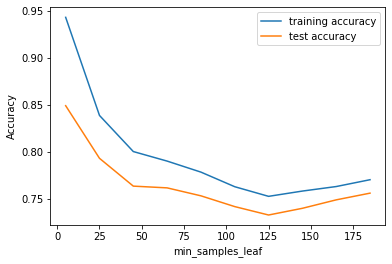

In [104]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Optimum Minimum Sample Leaf is 5 to 125

In [105]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [106]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.943151,0.015955,0.001000,2.132481e-07,5,{'min_samples_split': 5},0.877770,0.882535,0.885633,0.882535,0.880629,0.881820,0.002584,1,0.995116,0.993507,0.994877,0.995175,0.994639,0.994663,0.000608
1,0.952707,0.022457,0.001399,4.881529e-04,25,{'min_samples_split': 25},0.840362,0.836073,0.839886,0.832023,0.845366,0.838742,0.004474,2,0.934358,0.933107,0.933226,0.929533,0.941863,0.934417,0.004060
2,0.908067,0.013371,0.001800,4.000432e-04,45,{'min_samples_split': 45},0.818203,0.807005,0.809388,0.800810,0.820348,0.811151,0.007233,3,0.893614,0.895044,0.890041,0.885513,0.898737,0.892590,0.004504
3,0.890882,0.020301,0.001400,4.898823e-04,65,{'min_samples_split': 65},0.800810,0.796760,0.784370,0.775316,0.801048,0.791661,0.010180,4,0.865618,0.867703,0.854956,0.850012,0.865916,0.860841,0.007037
4,0.891103,0.020732,0.001608,4.815689e-04,85,{'min_samples_split': 85},0.783893,0.773648,0.773648,0.760067,0.786038,0.775459,0.009236,5,0.844294,0.842268,0.833274,0.833750,0.841256,0.838968,0.004564


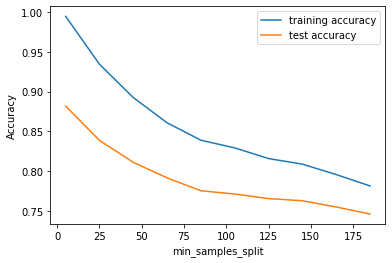

In [107]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Optimum samples split seems tobe 20-25

In [108]:
#Creating the final decison tree with all the hyperparmeters
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'cr

In [109]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.253324,0.110845,0.002293,4.076183e-04,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.719323,0.703360,0.789373,0.792471,0.752442,0.751394,0.035963,110,0.737431,0.719621,0.790267,0.792947,0.756791,0.759411,0.028810
1,1.256227,0.100716,0.001998,5.539116e-06,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.719323,0.703598,0.789373,0.792471,0.752442,0.751442,0.035899,108,0.737431,0.719621,0.790267,0.792947,0.756791,0.759411,0.028810
2,1.226820,0.116660,0.002201,4.012355e-04,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.719323,0.703598,0.789373,0.792471,0.752442,0.751442,0.035899,108,0.737431,0.719621,0.790267,0.792947,0.756791,0.759411,0.028810
3,1.113372,0.062702,0.002201,4.003049e-04,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.719323,0.704313,0.789373,0.792471,0.752442,0.751584,0.035709,105,0.737431,0.719621,0.790267,0.792947,0.756791,0.759411,0.028810
4,1.144573,0.109766,0.002001,7.599534e-07,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.719323,0.704074,0.785561,0.791994,0.749821,0.750155,0.034866,122,0.737431,0.719621,0.786991,0.791279,0.754408,0.757946,0.027774


In [110]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8062902072909222
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [111]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6680, 1499],
       [ 303,  512]], dtype=int64)

In [112]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.6282208588957056
Specificity:  0.8167257610954884
false postive rate:  0.18327423890451155
positive predictive value:  0.2545997016409746
Negative predictive value:  0.9566089073464127
Misclassification Rate:  0.2003557927507227


We have considerably reduced the misclassification rate, cmpared to the model with default hyper-parameters

## Random Forest Classifier with PCA

In [113]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')
# fit
rfc.fit(df_train_pca,y_train)
# Making predictions
y_pred_default = rfc.predict(df_test_pca)
confusion_rf=confusion_matrix(y_test,y_pred_default)

TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.09570552147239264
Specificity:  0.9937645188898399
false postive rate:  0.006235481110160166
positive predictive value:  0.6046511627906976
Negative predictive value:  0.9168640721940214
Misclassification Rate:  0.08761396486546587


We can improve the model further by tuning the hyperparamters

## Random Forest Classification + PCA with Hyperparameter tuning

In [114]:
#New Model with tuning max_depth
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.003279,0.216394,0.037808,0.003125,2,{'max_depth': 2},0.778651,0.767929,0.787467,0.790803,0.776984,0.780367,0.008104,4,0.788301,0.773171,0.793603,0.794615,0.768942,0.783726,0.010649
1,7.760802,0.107524,0.059212,0.006048,7,{'max_depth': 7},0.869431,0.875149,0.880152,0.890874,0.894687,0.882059,0.009466,3,0.899988,0.901001,0.903860,0.908447,0.909221,0.904503,0.003765
2,10.166540,0.137721,0.065419,0.003391,12,{'max_depth': 12},0.915178,0.914463,0.919705,0.920419,0.915892,0.917131,0.002446,2,0.975459,0.972599,0.973136,0.974446,0.975220,0.974172,0.001129
3,10.096117,0.406535,0.059595,0.004005,17,{'max_depth': 17},0.916845,0.917084,0.921611,0.923517,0.919466,0.919705,0.002579,1,0.990589,0.989814,0.991125,0.990291,0.989635,0.990291,0.000537


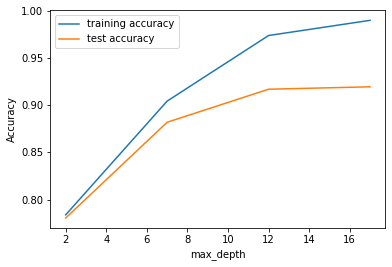

In [115]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Optimum depth is 12

In [116]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.613348,0.831275,0.069860,0.013235,100,{'n_estimators': 100},0.904932,0.906600,0.916369,0.916607,0.913748,0.911651,0.004937,2,0.956040,0.956159,0.955861,0.955147,0.959971,0.956636,0.001704
1,47.578208,0.811421,0.336989,0.024270,500,{'n_estimators': 500},0.907791,0.906123,0.913986,0.915178,0.914701,0.911556,0.003810,3,0.958542,0.957589,0.957708,0.958006,0.959912,0.958351,0.000847
2,80.767117,0.543560,0.507943,0.010333,900,{'n_estimators': 900},0.907076,0.905647,0.914939,0.915178,0.914463,0.911461,0.004194,4,0.958304,0.956934,0.957529,0.958423,0.960150,0.958268,0.001086
3,106.865737,0.925574,0.609553,0.013373,1300,{'n_estimators': 1300},0.906838,0.908268,0.916607,0.914939,0.915178,0.912366,0.003997,1,0.958244,0.957827,0.957708,0.958304,0.960746,0.958566,0.001114


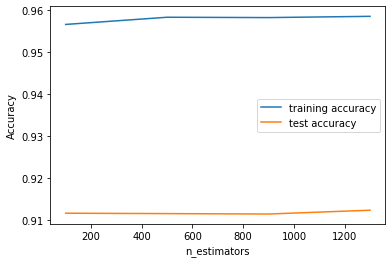

In [117]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As the estimators increase, there is a small improvement in the accuracy till 500 estimators

In [118]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.094307,0.415399,0.069930,0.003800,4,{'max_features': 4},0.906838,0.907076,0.912795,0.914939,0.911604,0.910650,0.003200,1,0.958899,0.958899,0.958363,0.958661,0.959614,0.958887,0.000413
1,10.806125,0.753407,0.069215,0.007055,8,{'max_features': 8},0.904456,0.907076,0.913748,0.911842,0.913510,0.910126,0.003714,2,0.956397,0.955325,0.955027,0.957112,0.957887,0.956350,0.001072
2,17.915032,0.834739,0.060414,0.003556,14,{'max_features': 14},0.903741,0.903503,0.909936,0.913033,0.911604,0.908363,0.003994,3,0.953896,0.952526,0.950739,0.953062,0.954134,0.952871,0.001212
3,23.929801,0.357352,0.052412,0.004588,20,{'max_features': 20},0.895878,0.896593,0.904456,0.908030,0.909697,0.902931,0.005727,4,0.948832,0.948118,0.945795,0.947462,0.950441,0.948130,0.001532
4,26.681993,0.683917,0.044427,0.000376,24,{'max_features': 24},0.896593,0.898261,0.902311,0.906838,0.908506,0.902502,0.004643,5,0.947343,0.944365,0.942518,0.945616,0.949488,0.945866,0.002401


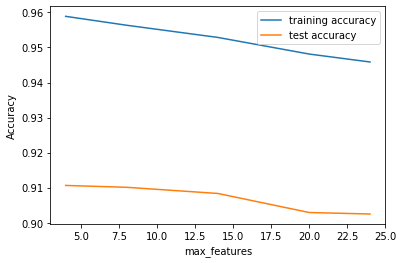

In [119]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

5- 7 features seem to be optimum.

In [120]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.523925,0.511134,0.064630,0.005340,100,{'min_samples_leaf': 100},0.860376,0.859423,0.859185,0.873481,0.874196,0.865332,0.006960,1,0.884739,0.878068,0.879914,0.884203,0.879736,0.881332,0.002648
1,7.617919,0.461939,0.060214,0.002927,150,{'min_samples_leaf': 150},0.850369,0.846081,0.848701,0.854420,0.864189,0.852752,0.006327,2,0.869252,0.862759,0.867107,0.863593,0.865559,0.865654,0.002353
2,6.801734,0.537374,0.060814,0.012768,200,{'min_samples_leaf': 200},0.839886,0.843460,0.832738,0.849416,0.851322,0.843364,0.006708,3,0.858828,0.856981,0.853645,0.854301,0.851918,0.855135,0.002462
3,6.434539,0.188593,0.050538,0.003754,250,{'min_samples_leaf': 250},0.833929,0.832023,0.825113,0.842983,0.846319,0.836073,0.007666,4,0.852037,0.841732,0.841970,0.851918,0.845306,0.846593,0.004575
4,6.175350,0.130548,0.045232,0.003481,300,{'min_samples_leaf': 300},0.824637,0.831308,0.821301,0.830355,0.832261,0.827972,0.004262,5,0.837563,0.840124,0.836014,0.832499,0.835895,0.836419,0.002483


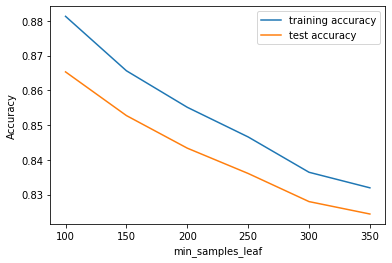

In [121]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

100 - 150 leaf samples seems to be the optimum

In [122]:
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,n_jobs=-1)
rf.fit(df_train_pca, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.635923,0.725277,0.068016,0.005968,200,{'min_samples_split': 200},0.878485,0.877770,0.883488,0.891827,0.897308,0.885776,0.007643,1,0.911723,0.904575,0.907910,0.910353,0.909459,0.908804,0.002451
1,9.386847,0.668494,0.063120,0.003742,250,{'min_samples_split': 250},0.869907,0.876579,0.872766,0.882535,0.886109,0.877579,0.006006,2,0.900286,0.900405,0.897486,0.899571,0.898380,0.899226,0.001129
2,9.323937,0.589828,0.062915,0.005353,300,{'min_samples_split': 300},0.868954,0.865380,0.867763,0.880629,0.882059,0.872957,0.006959,3,0.896533,0.890100,0.886228,0.894865,0.891351,0.891816,0.003631
3,8.539203,0.127105,0.056376,0.003706,350,{'min_samples_split': 350},0.858709,0.860853,0.861091,0.870145,0.879914,0.866142,0.007930,4,0.886169,0.877353,0.883369,0.880331,0.881046,0.881654,0.002965
4,8.293100,0.028688,0.052376,0.005907,400,{'min_samples_split': 400},0.856088,0.851799,0.854182,0.863236,0.876817,0.860424,0.009042,5,0.880272,0.873362,0.874375,0.874732,0.877770,0.876102,0.002551


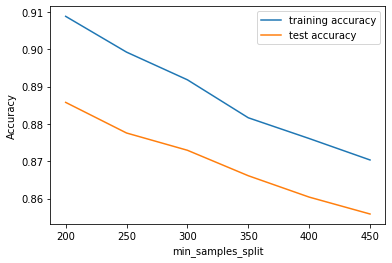

In [123]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

200-250 is the optimum range of minimum samples split.

In [124]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.7min finished


We can get accuracy of 0.8659042172980701 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [125]:
#Building a model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)
# fit
rfc.fit(df_train_pca,y_train)
# predict
y_pred_default = rfc.predict(df_test_pca)

print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      8179
         1.0       0.37      0.70      0.49       815

    accuracy                           0.87      8994
   macro avg       0.67      0.79      0.71      8994
weighted avg       0.91      0.87      0.88      8994

[[7219  960]
 [ 242  573]]
accuracy_score:   0.8663553480097843


In [126]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8663553480097843
Sensitivity:  0.7030674846625767
Specificity:  0.8826262379263968
false postive rate:  0.11737376207360313
positive predictive value:  0.37377690802348335
Negative predictive value:  0.967564669615333
Misclassification Rate:  0.1336446519902157


## PCA Model Performances

#### Logistic Regression with PCA
- Accuracy Score on test data:  0.82 approx
- Sensitivity:  0.80 approx
- Specificity:  0.81 approx
- False postive rate:  0.18 approx
- Precision:  0.30 approx
- Recall:  0.97 approx
- Misclassification Rate:  0.18 approx

#### Decision Tree Classifier with PCA
- Sensitivity:  0.64 approx
- Specificity:  0.81 approx
- False postive rate:  0.18 approx
- Precision:  0.26 approx
- Recall:  0.95 approx
- Misclassification Rate:  0.19 approx

#### Random Forest Classifier with PCA
- Accuracy Score:   0.86 approx
- Sensitivity:  0.69 approx
- Specificity:  0.88 approx
- False postive rate:  0.11 approx
- Precision:  0.37 approx
- Recall:  0.96 approx
- Misclassification Rate:  0.13 approx

In terms of overall accuracy the Random Forest classifier performs best, but since we are dealing with a business problem which requires the churn prediction to be optimum, our model metric should be Sensitivity. Thus, the Logistic Regression Model performs the best and can be used to perform the prediction.

## Random Forest on all Features without PCA + Hyperparameter Tuning

In [127]:
# specify number of folds for k-fold CV
n_folds = 5

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}

# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1,return_train_score=True)

# fit
grid_search.fit(X_train,y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  5.3min finished


We can get accuracy of 0.8731951393852752 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 300}


In [128]:
#Creating a model with the best parameters
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=150, 
                             min_samples_split=200,
                             max_features=15,
                             n_estimators=500)

# fit
rfc_final.fit(X_train,y_train)

# predict
predictions = rfc_final.predict(X_test)

confusion_rm_f = metrics.confusion_matrix( y_test, predictions )
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8696909050478097
Sensitivity:  0.841717791411043
Specificity:  0.87247829808045
False postive rate:  0.12752170191955006
Positive predictive value:  0.3967611336032389
Negative predictive value:  0.9822436338609772
Misclassification Rate:  0.13030909495219034


The model gives an accuracy of 87% and a Sensitivity of 82%, which is quite good.

## Feature Importance of the Final Random Forest Model

In [129]:
#feature_names=list(X_train.columns.values)
feature_names=X.columns
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(),key=lambda kv: kv[1], reverse=True))

#Feature Importance Top 15 Features
dic= dict(d_descending)

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=15
n_items = take(n, dic.items())
print('These are top 12 driver variable: ',n_items)

These are top 12 driver variable:  [('roam_ic_mou_8', 0.14975577813650745), ('arpu_8', 0.148128314436312), ('last_day_rch_amt_8', 0.11424496474905042), ('arpu_diff', 0.11343243370269378), ('max_rech_amt_8', 0.07181077807605107), ('std_og_mou_diff', 0.04903717884350371), ('roam_ic_mou_diff', 0.04789560871632651), ('date_of_last_rech_8', 0.03529481801795088), ('total_rech_num_diff', 0.0348490878724376), ('max_rech_amt_diff', 0.025686448021022112), ('loc_ic_mou_diff', 0.021439577511165722), ('offnet_mou_diff', 0.02016047784505815), ('loc_og_mou_diff', 0.016390827182690894), ('date_of_last_rech_data_8', 0.01212586413277848), ('onnet_mou_diff', 0.010706599625297448)]


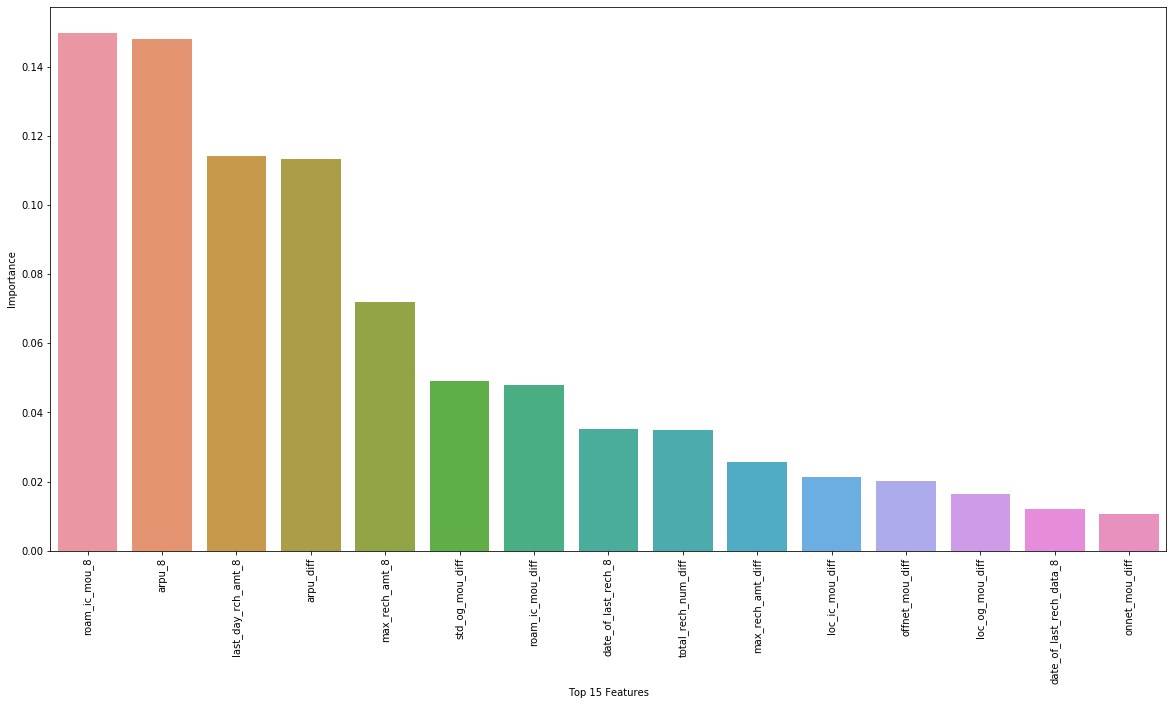

In [130]:
#Plotting the important Features
imp=rfc_final.feature_importances_
#names=X_train.columns.values
names=X.columns
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:15])
ax.set(xlabel = 'Top 15 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

In [133]:
end = time.time()
print("Total Time taken to run the full script is ",end - start)

Total Time taken to run the full script is  1678.3860416412354


# Important churn indicators & Actionable recommendations


### Average_Revenue_Per_User(arpu) in August :
This is one of the most important factor for the Churn, If the candidate has arpu in August is low than high chance is that it will churn
### Roaming_Incoming_Calls_monthly_usage in August :
This means the person has transferred to a new geographic location hence the person is in roaming therefore not using this number anymore even for incoming calls.
### Last_recharge_amount & Maximum_recharge_amount  in August :
Since the last recharge is cruicial in continuing the service hence this is also an important churn factor. If the last recharge amount is lower thant the previous amount than the person is likely to churn.
### STD Outgoing Calls_monthly_usage difference with respect to earlier months :
Difference in average of Outgoing Calls in june and July w.r.t August, STD calls,Local Calls are important parameters because as the difference is increasing the customer is likely to churn out of the service provider
### Recharge amount difference with respect to earlier months :
Difference in average of recharge amount in june and July w.r.t August, STD calls,Local Calls are important parameters because as the difference is increasing the customer is likely to churn out of the service provider
### On Net Calls monthly difference with respect to earlier monthst :
Difference in average of in network calls in june and July w.r.t August, STD calls,Local Calls are important parameters because as the difference is increasing the customer is likely to churn out of the service provider

#### Hence as soon as the about indicators show up make sure the candidate is offered promotional offers to continue service





